train.csv - The training set.
Id Unique identifier for each observation.
AB-GL Fifty-six anonymized health characteristics. All are numeric except for EJ, which is categorical.
Class A binary target: 1 indicates the subject has been diagnosed with one of the three conditions, 0 indicates they have not.

[Logistic Regression, Random Forest, Gradient Boosting Models (e.g., XGBoost, LightGBM, Support Vector Machines (SVM)]

GridSearchCV
RandomizedSearchCV
Bayesian Optimization
HyperOpt
Optuna

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(617, 58)


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [4]:
data['EJ'].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [5]:
# converting categorical columns
data = data.replace({'EJ':{'A':0, 'B':1}})

In [6]:
data.isnull().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [7]:
# fill missing age values with the median value
data['BQ'] = data['BQ'].fillna(data['BQ'].median())
data['CB'] = data['CB'].fillna(data['CB'].median())
data['CC'] = data['CC'].fillna(data['CC'].median())
data['DU'] = data['DU'].fillna(data['DU'].median())
data['EL'] = data['EL'].fillna(data['EL'].median())

data['FC'] = data['FC'].fillna(data['FC'].median())
data['FL'] = data['FL'].fillna(data['FL'].median())
data['FS'] = data['FS'].fillna(data['FS'].median())
data['GL'] = data['GL'].fillna(data['GL'].median())

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      617 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      617 non-null    float64
 17  CC      617 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [9]:
data.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [10]:
data['Class'].value_counts()

0    509
1    108
Name: Class, dtype: int64

In [11]:
data.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.429301,3.533905,0.420947,20.724856,131.714987,14679.595398,31.489716,50.584437,8.517682,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.487330,50.181948,1.303281,9.991907,144.181524,19352.959387,9.864239,36.266251,10.323895,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124414,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.237329,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [12]:
correlation_matrix = data.corr()

correlation_threshold = 0.5

In [13]:
# Find highly correlated features
highly_correlated_features = correlation_matrix[((correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)) & (correlation_matrix != 1)]
highly_correlated_features = highly_correlated_features.unstack().dropna().reset_index()

# Print the highly correlated features
print("Highly Correlated Features:")
for index, row in highly_correlated_features.iterrows():
    feature1 = row['level_0']
    feature2 = row['level_1']
    correlation = row[0]
    print(f"{feature1} - {feature2}: {correlation:.2f}")

Highly Correlated Features:
AB - AM: 0.53
AH - AR: 0.75
AH - CH: 0.68
AH - CL: 0.69
AH - CS: 0.63
AH - DV: 0.75
AH - EB: 0.71
AH - EP: 0.68
AM - AB: 0.53
AR - AH: 0.75
AR - CH: 0.66
AR - CL: 0.75
AR - CS: 0.72
AR - DV: 0.82
AR - EB: 0.74
AR - EP: 0.75
AY - BD : 0.51
BC - BD : 0.75
BC - BZ: 0.91
BC - CF: 0.55
BD  - AY: 0.51
BD  - BC: 0.75
BD  - BZ: 0.68
BZ - BC: 0.91
BZ - BD : 0.68
BZ - CC: 0.51
BZ - CF: 0.54
CC - BZ: 0.51
CF - BC: 0.55
CF - BZ: 0.54
CH - AH: 0.68
CH - AR: 0.66
CH - CL: 0.56
CH - CS: 0.60
CH - DV: 0.61
CH - EB: 0.62
CH - EP: 0.57
CL - AH: 0.69
CL - AR: 0.75
CL - CH: 0.56
CL - CS: 0.63
CL - DV: 0.95
CL - EB: 0.62
CL - EP: 0.65
CS - AH: 0.63
CS - AR: 0.72
CS - CH: 0.60
CS - CL: 0.63
CS - DV: 0.69
CS - EB: 0.69
CS - EP: 0.79
DU - EH: 0.85
DU - FD : 0.81
DU - FL: 0.61
DV - AH: 0.75
DV - AR: 0.82
DV - CH: 0.61
DV - CL: 0.95
DV - CS: 0.69
DV - EB: 0.69
DV - EP: 0.72
EB - AH: 0.71
EB - AR: 0.74
EB - CH: 0.62
EB - CL: 0.62
EB - CS: 0.69
EB - DV: 0.69
EB - EP: 0.73
EH - DU: 0.85

In [14]:
# find highly correlated features with diagnosis
highly_correlated_features = np.abs(correlation_matrix['Class']).sort_values(ascending=False)
highly_correlated_features= highly_correlated_features[highly_correlated_features > correlation_threshold]

# print the highly correlated features
print("Highly Correlated Features with Diagnosis: ")
for feature, correlation in highly_correlated_features.iteritems():
    print(f"{feature}: {correlation:.2f}")

Highly Correlated Features with Diagnosis: 
Class: 1.00


In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [16]:
X = data.drop(['Class', 'Id'], axis=1)
y = data['Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

###### logistic regression

In [25]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 83.87096774193549


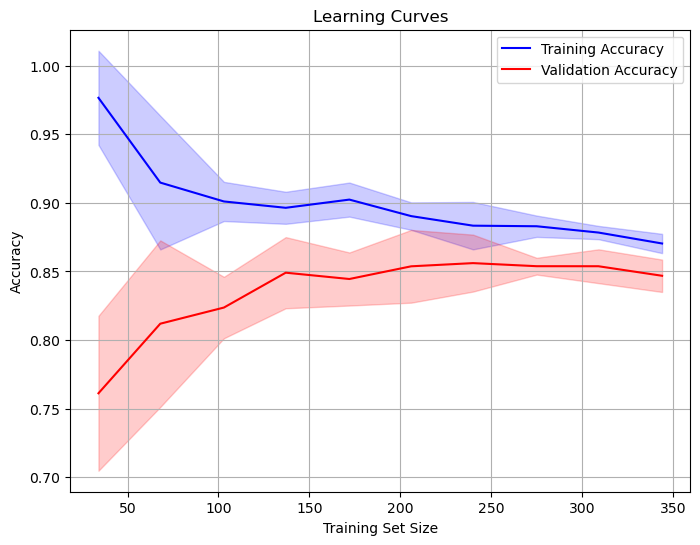

In [27]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 89.78494623655914


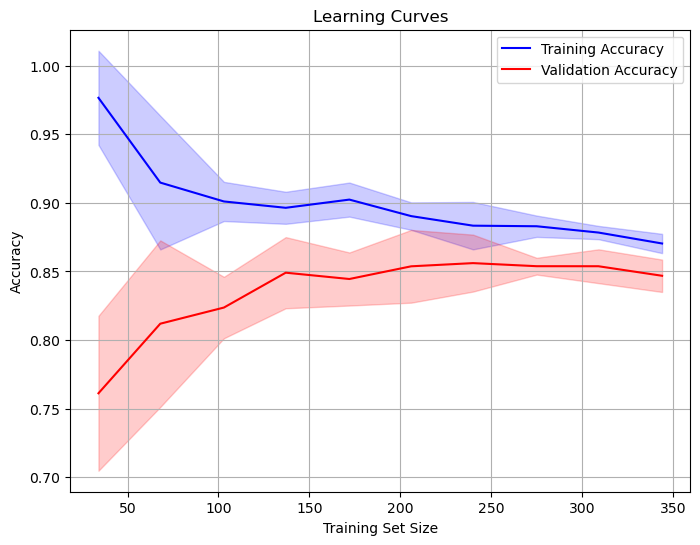

In [29]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# create a logistic regression model
model = LogisticRegression()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)
print()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")


Best Parameters: 
{'C': 1}

Accuracy: 83.87096774193549


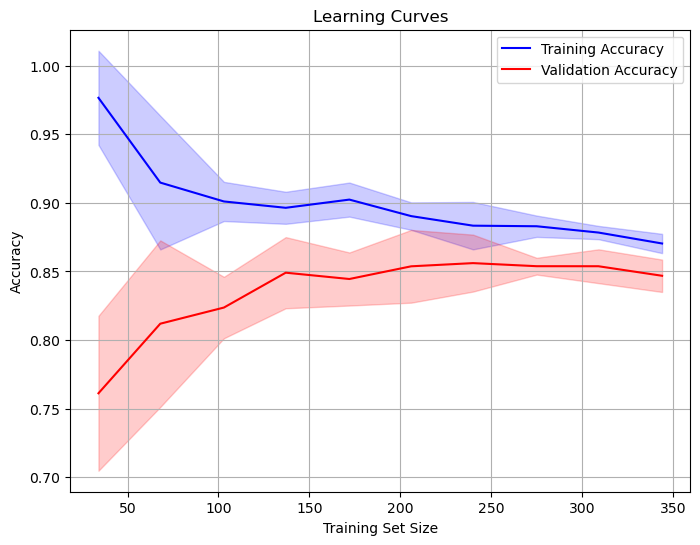

In [31]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# create a logistic regression model
model = LogisticRegression()

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)
print()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")


Best Parameters: 
{'C': 0.1}

Accuracy: 89.78494623655914


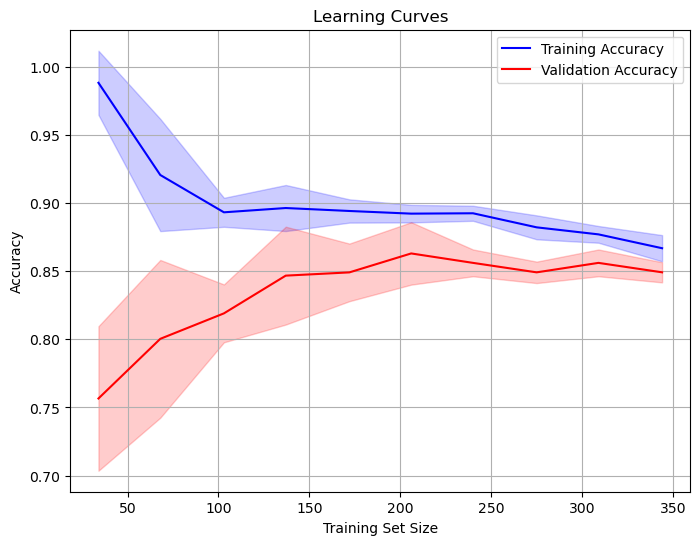

In [33]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### support vector machines

In [36]:
model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 81.72043010752688


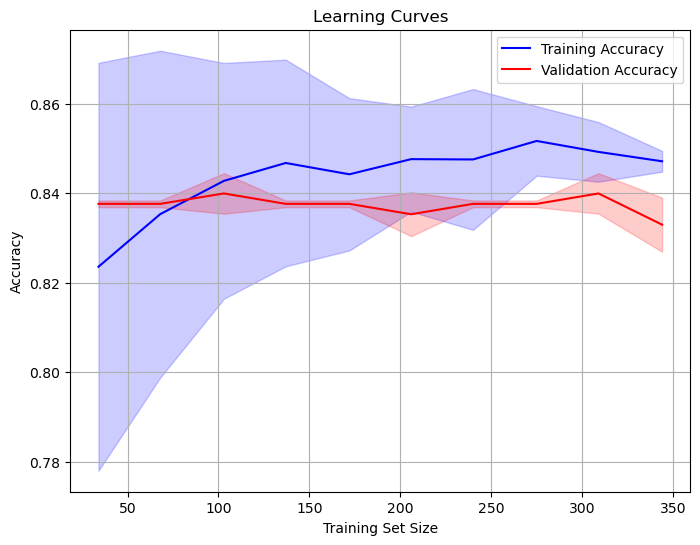

In [37]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
model = SVC()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 89.78494623655914


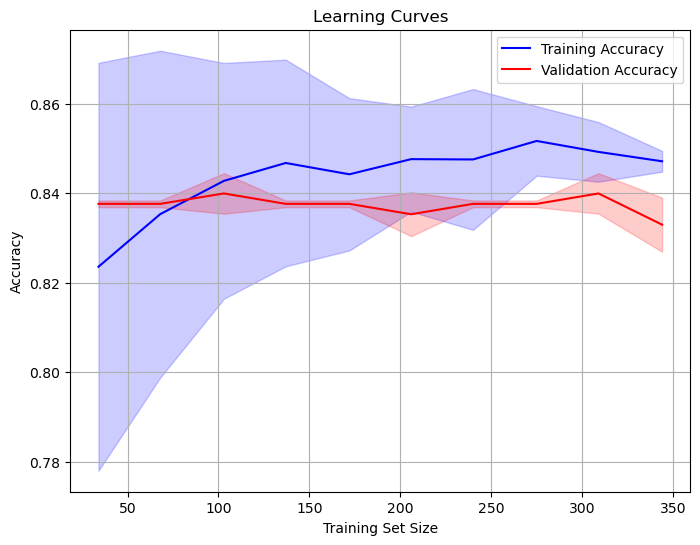

In [39]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['lnear', 'rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# support vector machine model
model = SVC(**best_params)

# fit the model on the training data
model.fit(X_train, y_train)

# predict on the test datad
y_pred = model.predict(X_test)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 79.56989247311827


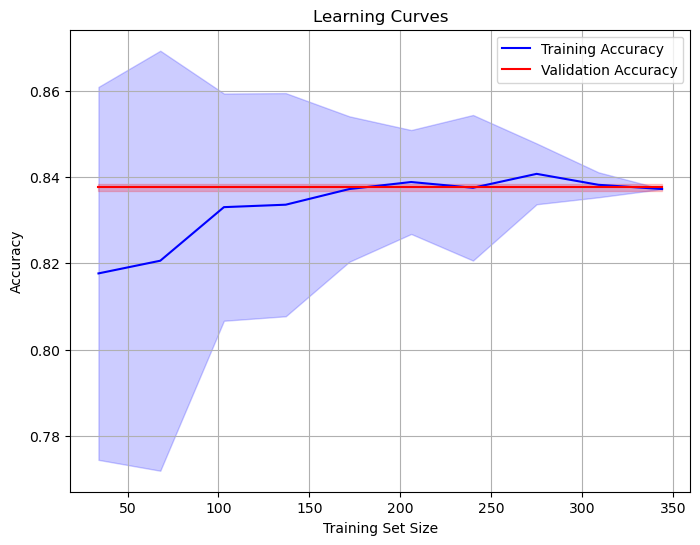

In [41]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['lnear', 'rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# get the best hyperparameters
best_params = grid_search.best_params_

# logistic regression model
model = SVC(**best_params)

# fit the model on the training data
model.fit(X_train_scaled, y_train)

# predict on the test data
y_pred = model.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 81.18279569892472


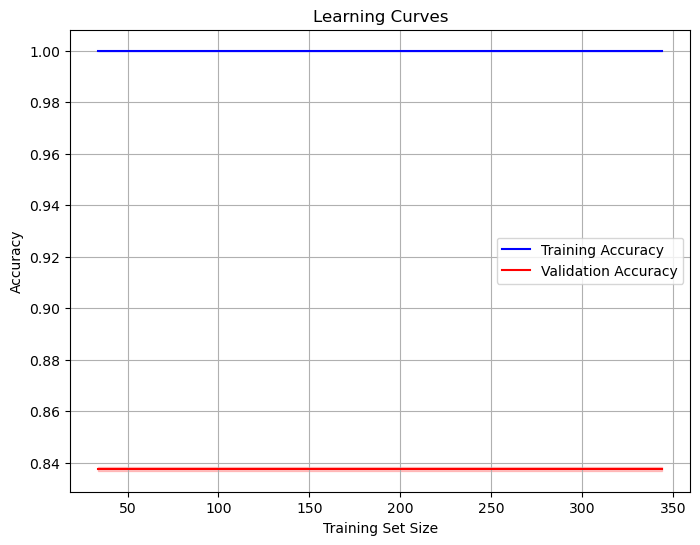

In [43]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### random forest 

In [44]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 91.93548387096774


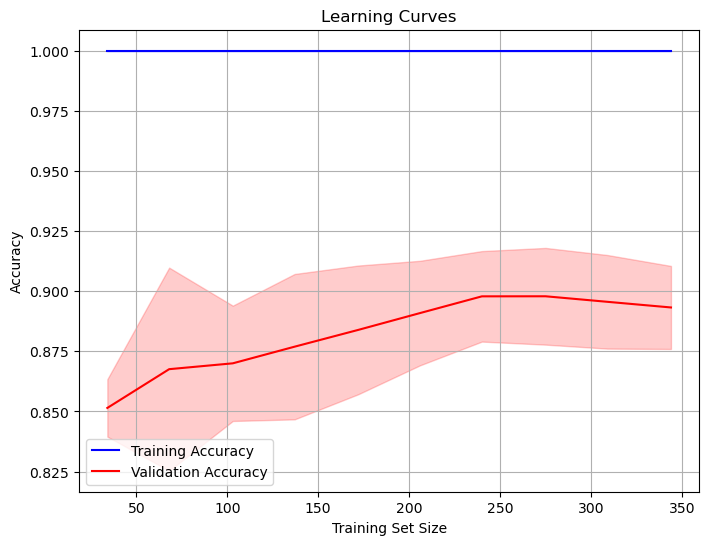

In [45]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
model = RandomForestClassifier()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 86.02150537634408


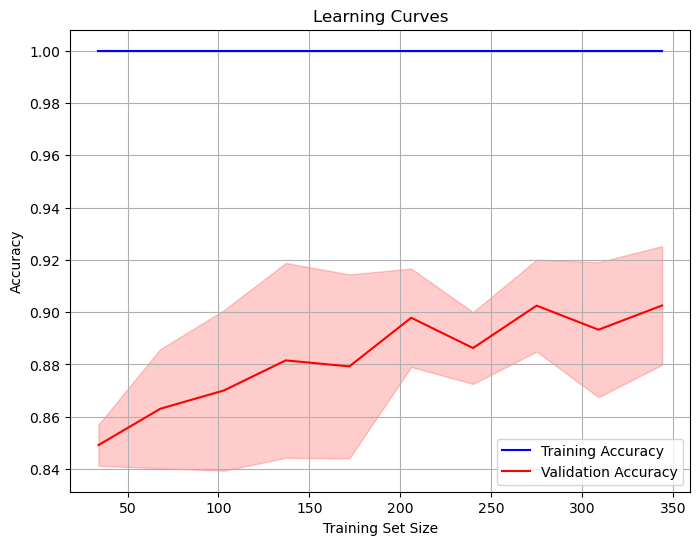

In [47]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### gradient boosting classifier

In [48]:
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 93.54838709677419


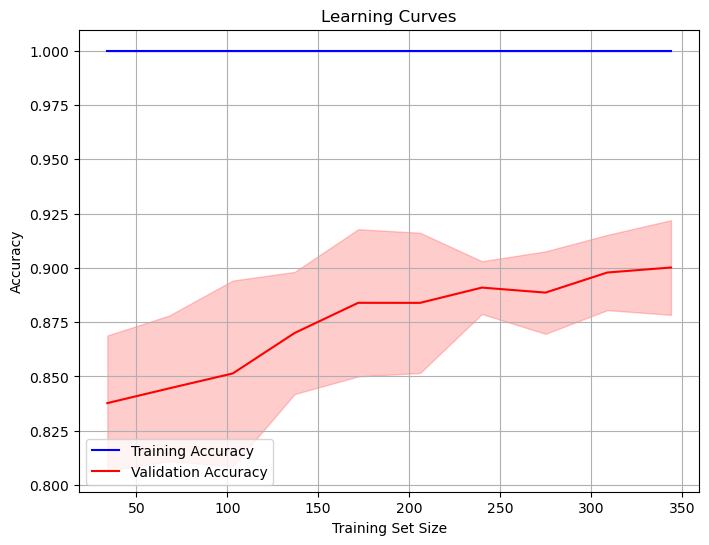

In [49]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
model = GradientBoostingClassifier()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 86.02150537634408


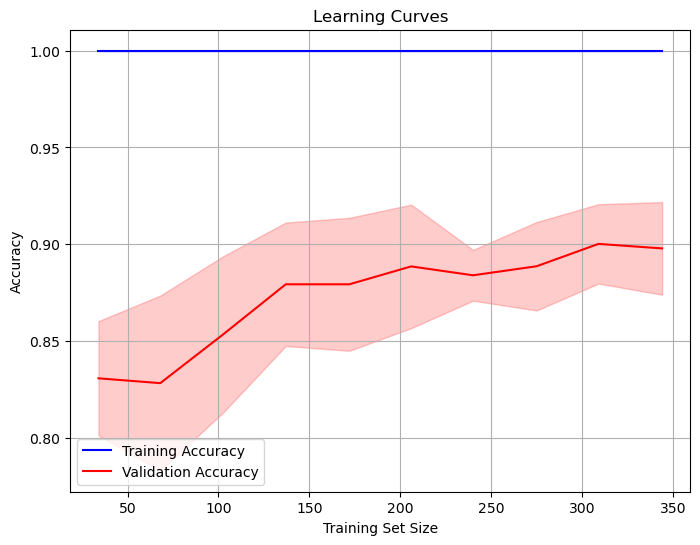

In [51]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

###### decision trees

In [53]:
# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 88.70967741935483


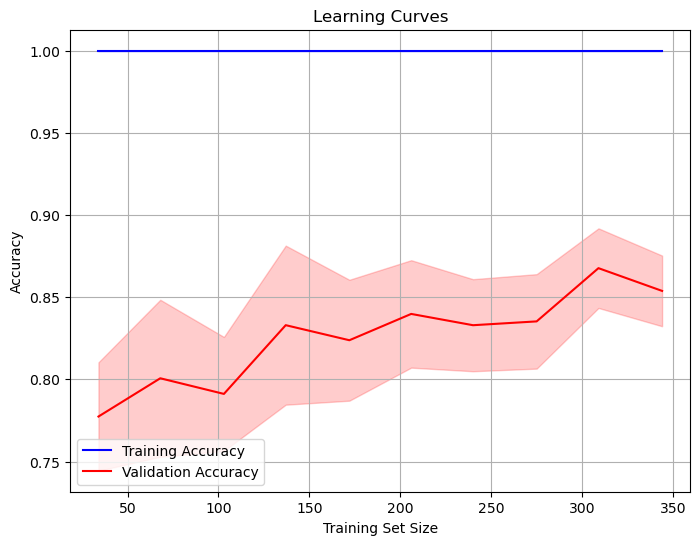

In [54]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 66.66666666666666


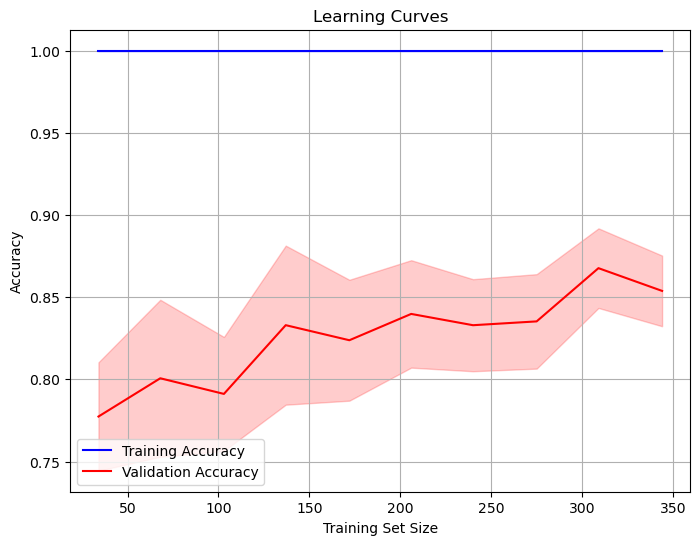

In [56]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)
print()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")


Best Parameters: 
{'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Accuracy: 90.32258064516128


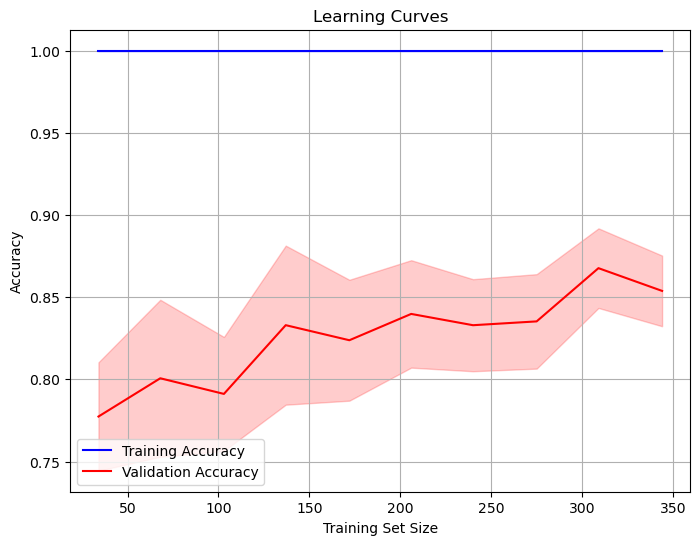

In [58]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]}

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)
print()

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")


Best Parameters: 
{'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}

Accuracy: 61.82795698924731


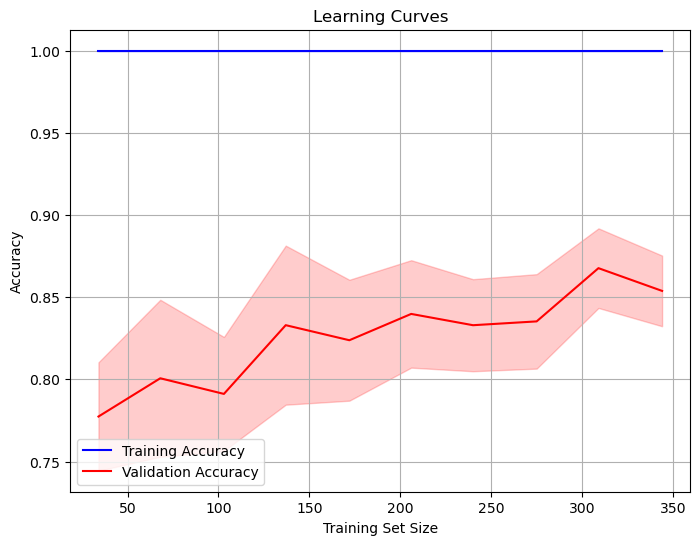

In [60]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### naive bayes

In [61]:
# Create a Naive Bayes classifier
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 84.94623655913979


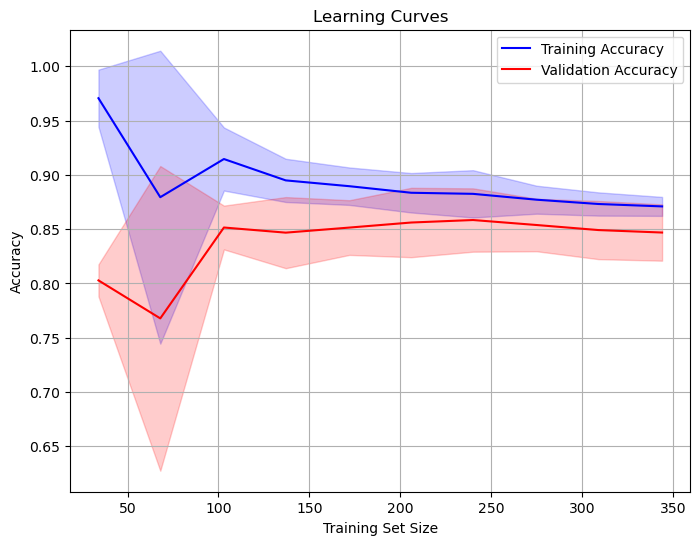

In [62]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Create a Naive Bayes classifier
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 23.118279569892472


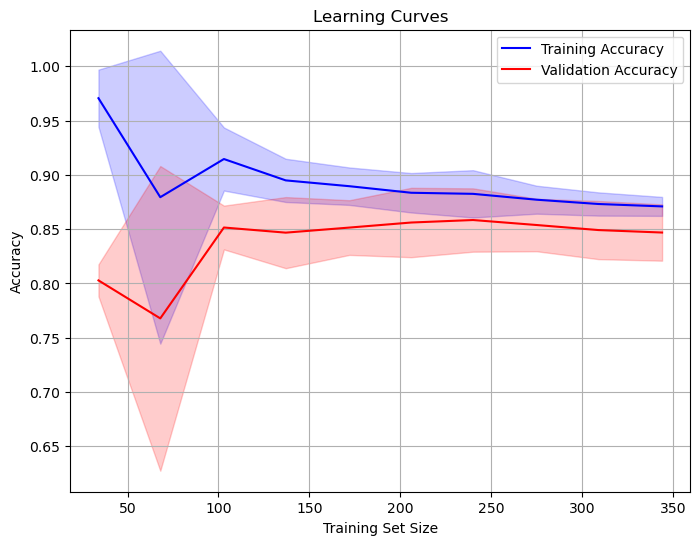

In [64]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Create a Naive Bayes classifier
model = GaussianNB()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")


Best Parameters: 
{'var_smoothing': 0.01873817422860384}
Accuracy: 81.72043010752688


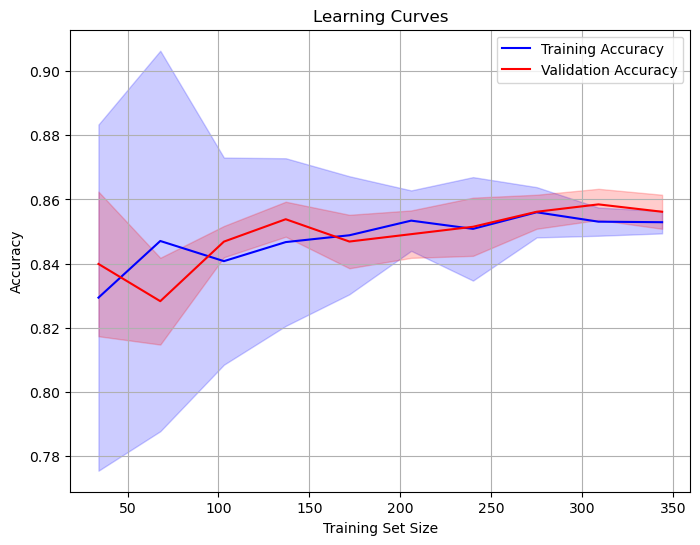

In [66]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Create a Naive Bayes classifier
model = GaussianNB()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")


Best Parameters: 
{'var_smoothing': 5.3366992312063123e-05}
Accuracy: 25.268817204301076


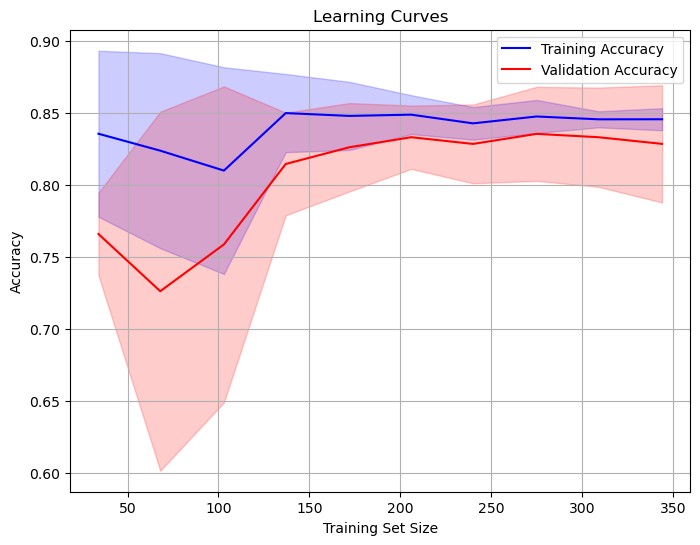

In [68]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### k-nearest neighbors

In [69]:
# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 81.18279569892472


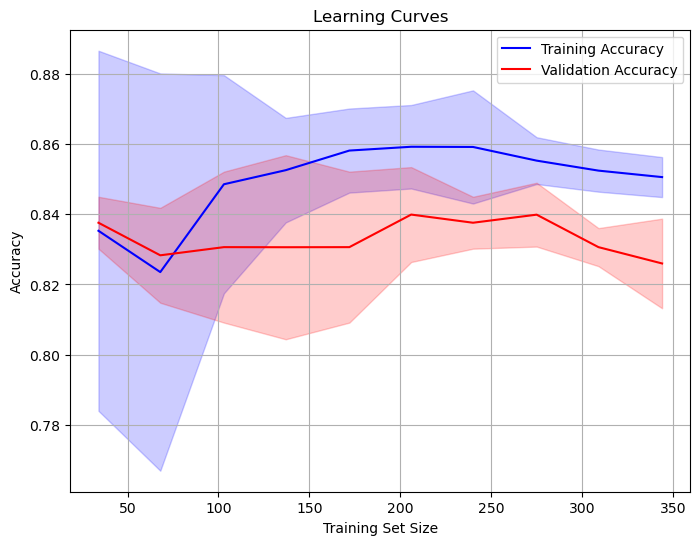

In [70]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
# Create a KNN classifier
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

Accuracy: 87.63440860215054


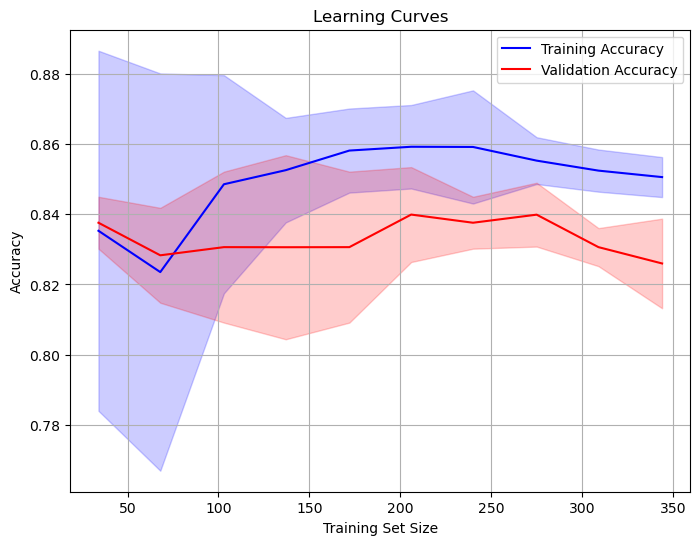

In [72]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN classifier
model = KNeighborsClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")


Best Parameters: 
{'n_neighbors': 9}
Accuracy: 81.72043010752688


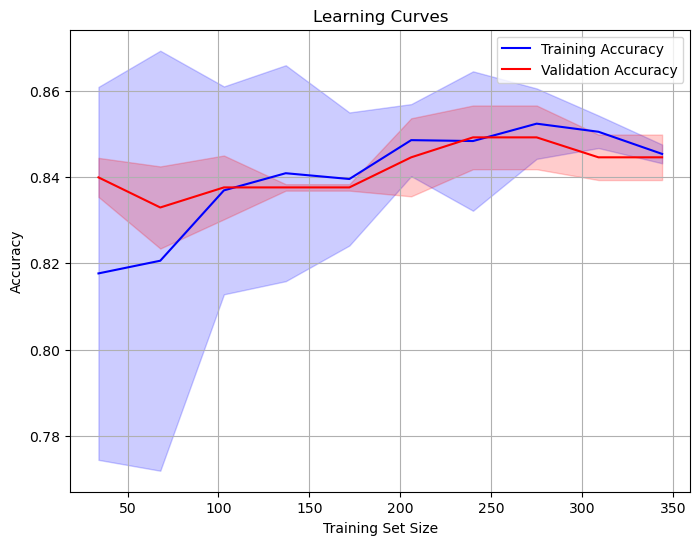

In [74]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN classifier
model = KNeighborsClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test_scaled)

# print the best parameters found during hyperparameter tuning
print("\nBest Parameters: ")
print(best_params)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")


Best Parameters: 
{'n_neighbors': 3}
Accuracy: 88.17204301075269


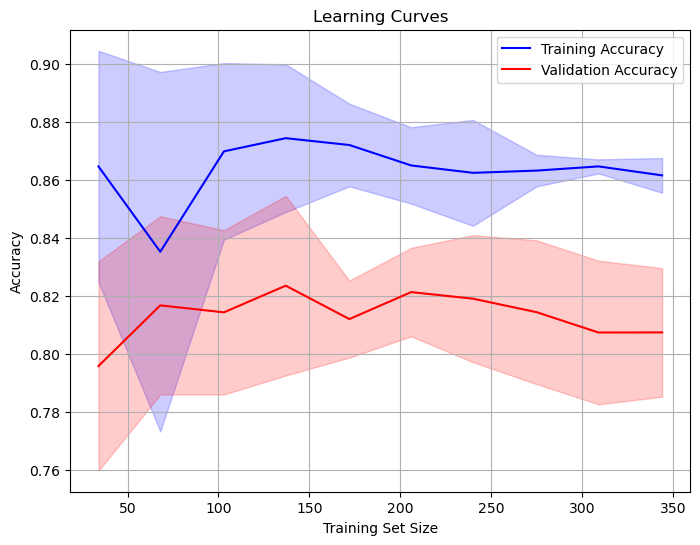

In [76]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import optuna

###### logistic regression

In [77]:
# Define the objective function for hyperparameter tuning
def objective(trial):
    C = trial.suggest_loguniform("C", 0.01, 10)
    max_iter = trial.suggest_int("max_iter", 100, 1000, step=100)

    model = LogisticRegression(C=C, max_iter=max_iter, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the logistic regression model with the best hyperparameters
best_model = LogisticRegression(
    C=study.best_params["C"], max_iter=study.best_params["max_iter"], random_state=42
)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 21:14:48,383] A new study created in memory with name: no-name-955013db-0707-45d4-b7e9-f6736ef533b0
[I 2023-07-27 21:14:48,542] Trial 0 finished with value: -0.8494623655913979 and parameters: {'C': 0.03649271828258042, 'max_iter': 800}. Best is trial 0 with value: -0.8494623655913979.
[I 2023-07-27 21:14:48,632] Trial 1 finished with value: -0.8064516129032258 and parameters: {'C': 0.04849858121008868, 'max_iter': 400}. Best is trial 0 with value: -0.8494623655913979.
[I 2023-07-27 21:14:48,711] Trial 2 finished with value: -0.8225806451612904 and parameters: {'C': 0.018152675092052935, 'max_iter': 500}. Best is trial 0 with value: -0.8494623655913979.
[I 2023-07-27 21:14:48,779] Trial 3 finished with value: -0.8064516129032258 and parameters: {'C': 0.175855231504566, 'max_iter': 300}. Best is trial 0 with value: -0.8494623655913979.
[I 2023-07-27 21:14:48,871] Trial 4 finished with value: -0.8440860215053764 and parameters: {'C': 0.024765960897464218, 'max_iter': 600}. 

[I 2023-07-27 21:14:55,523] Trial 41 finished with value: -0.8494623655913979 and parameters: {'C': 0.09036427199592337, 'max_iter': 1000}. Best is trial 0 with value: -0.8494623655913979.
[I 2023-07-27 21:14:55,710] Trial 42 finished with value: -0.8387096774193549 and parameters: {'C': 0.10335378690384549, 'max_iter': 1000}. Best is trial 0 with value: -0.8494623655913979.
[I 2023-07-27 21:14:55,951] Trial 43 finished with value: -0.8333333333333334 and parameters: {'C': 0.06595238029299796, 'max_iter': 900}. Best is trial 0 with value: -0.8494623655913979.
[I 2023-07-27 21:14:56,120] Trial 44 finished with value: -0.8225806451612904 and parameters: {'C': 0.04235920141746551, 'max_iter': 1000}. Best is trial 0 with value: -0.8494623655913979.
[I 2023-07-27 21:14:56,401] Trial 45 finished with value: -0.8279569892473119 and parameters: {'C': 0.028961210873596564, 'max_iter': 900}. Best is trial 0 with value: -0.8494623655913979.
[I 2023-07-27 21:14:56,553] Trial 46 finished with value

[I 2023-07-27 21:15:04,446] Trial 82 finished with value: -0.7956989247311828 and parameters: {'C': 0.01861706653370425, 'max_iter': 500}. Best is trial 66 with value: -0.8602150537634409.
[I 2023-07-27 21:15:04,623] Trial 83 finished with value: -0.8118279569892473 and parameters: {'C': 0.03991749265469686, 'max_iter': 600}. Best is trial 66 with value: -0.8602150537634409.
[I 2023-07-27 21:15:04,942] Trial 84 finished with value: -0.8279569892473119 and parameters: {'C': 0.028345801836660755, 'max_iter': 700}. Best is trial 66 with value: -0.8602150537634409.
[I 2023-07-27 21:15:05,347] Trial 85 finished with value: -0.8333333333333334 and parameters: {'C': 0.02202869694339773, 'max_iter': 800}. Best is trial 66 with value: -0.8602150537634409.
[I 2023-07-27 21:15:05,803] Trial 86 finished with value: -0.8602150537634409 and parameters: {'C': 0.4104059515649937, 'max_iter': 1000}. Best is trial 66 with value: -0.8602150537634409.
[I 2023-07-27 21:15:06,068] Trial 87 finished with val

Best Hyperparameters: {'C': 0.018718267320624468, 'max_iter': 900}
Best Accuracy: 0.8602150537634409
Accuracy: 86.02150537634408


In [78]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 86.02150537634408


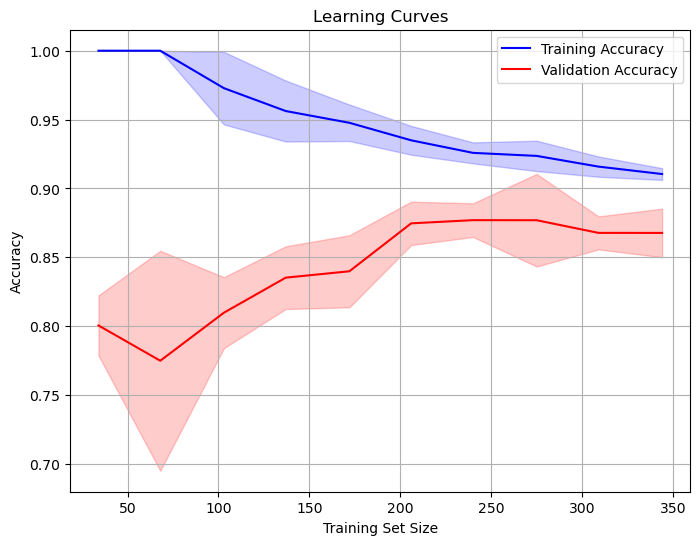

In [79]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
# Define the objective function for hyperparameter tuning
def objective(trial):
    C = trial.suggest_loguniform("C", 0.01, 10)
    max_iter = trial.suggest_int("max_iter", 100, 1000, step=100)

    model = LogisticRegression(C=C, max_iter=max_iter, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the logistic regression model with the best hyperparameters
best_model = LogisticRegression(
    C=study.best_params["C"], max_iter=study.best_params["max_iter"], random_state=42
)
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 21:16:30,208] A new study created in memory with name: no-name-f4d905e3-3fc2-40c2-a3f8-c1ee43a03c9f
[I 2023-07-27 21:16:30,231] Trial 0 finished with value: -0.8978494623655914 and parameters: {'C': 0.6827412708250151, 'max_iter': 400}. Best is trial 0 with value: -0.8978494623655914.
[I 2023-07-27 21:16:30,241] Trial 1 finished with value: -0.8763440860215054 and parameters: {'C': 0.017536324439334387, 'max_iter': 900}. Best is trial 0 with value: -0.8978494623655914.
[I 2023-07-27 21:16:30,271] Trial 2 finished with value: -0.8978494623655914 and parameters: {'C': 7.4208657982434865, 'max_iter': 700}. Best is trial 0 with value: -0.8978494623655914.
[I 2023-07-27 21:16:30,295] Trial 3 finished with value: -0.8978494623655914 and parameters: {'C': 1.0150031816086917, 'max_iter': 500}. Best is trial 0 with value: -0.8978494623655914.
[I 2023-07-27 21:16:30,306] Trial 4 finished with value: -0.8817204301075269 and parameters: {'C': 0.019687434054197376, 'max_iter': 600}. B

[I 2023-07-27 21:16:31,267] Trial 41 finished with value: -0.9139784946236559 and parameters: {'C': 0.063234751775865, 'max_iter': 900}. Best is trial 18 with value: -0.9139784946236559.
[I 2023-07-27 21:16:31,296] Trial 42 finished with value: -0.9139784946236559 and parameters: {'C': 0.07147555402433832, 'max_iter': 1000}. Best is trial 18 with value: -0.9139784946236559.
[I 2023-07-27 21:16:31,327] Trial 43 finished with value: -0.8978494623655914 and parameters: {'C': 0.09640088136030893, 'max_iter': 900}. Best is trial 18 with value: -0.9139784946236559.
[I 2023-07-27 21:16:31,364] Trial 44 finished with value: -0.8978494623655914 and parameters: {'C': 0.03573340228157373, 'max_iter': 1000}. Best is trial 18 with value: -0.9139784946236559.
[I 2023-07-27 21:16:31,389] Trial 45 finished with value: -0.8978494623655914 and parameters: {'C': 0.13812890799827998, 'max_iter': 800}. Best is trial 18 with value: -0.9139784946236559.
[I 2023-07-27 21:16:31,418] Trial 46 finished with valu

[I 2023-07-27 21:16:32,353] Trial 82 finished with value: -0.9139784946236559 and parameters: {'C': 0.0699675199633441, 'max_iter': 900}. Best is trial 18 with value: -0.9139784946236559.
[I 2023-07-27 21:16:32,382] Trial 83 finished with value: -0.9139784946236559 and parameters: {'C': 0.05952242860383595, 'max_iter': 1000}. Best is trial 18 with value: -0.9139784946236559.
[I 2023-07-27 21:16:32,406] Trial 84 finished with value: -0.9139784946236559 and parameters: {'C': 0.08327427625540143, 'max_iter': 800}. Best is trial 18 with value: -0.9139784946236559.
[I 2023-07-27 21:16:32,431] Trial 85 finished with value: -0.8978494623655914 and parameters: {'C': 0.04282477299382729, 'max_iter': 1000}. Best is trial 18 with value: -0.9139784946236559.
[I 2023-07-27 21:16:32,457] Trial 86 finished with value: -0.8924731182795699 and parameters: {'C': 0.03023720961161715, 'max_iter': 800}. Best is trial 18 with value: -0.9139784946236559.
[I 2023-07-27 21:16:32,481] Trial 87 finished with val

Best Hyperparameters: {'C': 0.06963644593598003, 'max_iter': 700}
Best Accuracy: 0.9139784946236559
Accuracy: 91.39784946236558


In [81]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 91.39784946236558


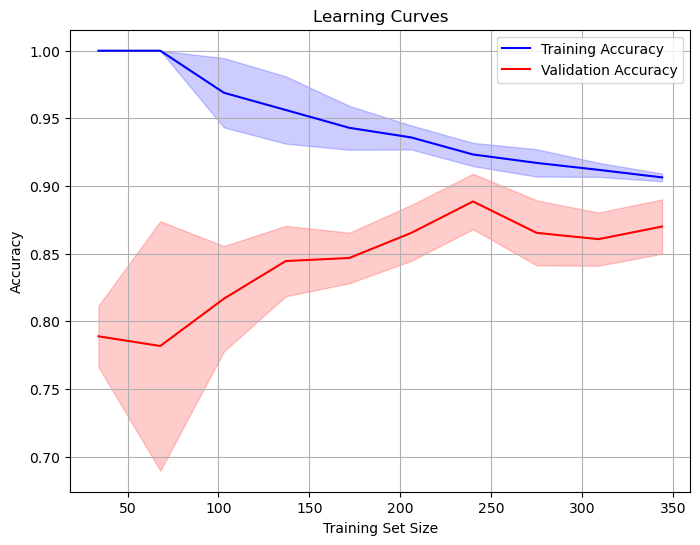

In [82]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### decision tree

In [83]:
# Define the objective function for hyperparameter tuning
def objective(trial):
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the decision tree model with the best hyperparameters
best_model = DecisionTreeClassifier(
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    min_samples_leaf=study.best_params["min_samples_leaf"],
    random_state=42
)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 21:17:18,410] A new study created in memory with name: no-name-5f0247aa-6917-442f-bbc6-6d862fcb09f4
[I 2023-07-27 21:17:18,431] Trial 0 finished with value: -0.9032258064516129 and parameters: {'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: -0.9032258064516129.
[I 2023-07-27 21:17:18,452] Trial 1 finished with value: -0.9086021505376344 and parameters: {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 1 with value: -0.9086021505376344.
[I 2023-07-27 21:17:18,469] Trial 2 finished with value: -0.9032258064516129 and parameters: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 1 with value: -0.9086021505376344.
[I 2023-07-27 21:17:18,491] Trial 3 finished with value: -0.8709677419354839 and parameters: {'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 1 with value: -0.9086021505376344.
[I 2023-07-27 21:17:18,515] Trial 4 finished with value: 

[I 2023-07-27 21:17:19,811] Trial 37 finished with value: -0.9032258064516129 and parameters: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 34 with value: -0.9193548387096774.
[I 2023-07-27 21:17:19,870] Trial 38 finished with value: -0.9193548387096774 and parameters: {'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 34 with value: -0.9193548387096774.
[I 2023-07-27 21:17:19,921] Trial 39 finished with value: -0.9193548387096774 and parameters: {'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 34 with value: -0.9193548387096774.
[I 2023-07-27 21:17:19,956] Trial 40 finished with value: -0.8817204301075269 and parameters: {'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 34 with value: -0.9193548387096774.
[I 2023-07-27 21:17:20,010] Trial 41 finished with value: -0.9193548387096774 and parameters: {'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 3}. Bes

[I 2023-07-27 21:17:21,587] Trial 74 finished with value: -0.9193548387096774 and parameters: {'max_depth': 6, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 34 with value: -0.9193548387096774.
[I 2023-07-27 21:17:21,632] Trial 75 finished with value: -0.9032258064516129 and parameters: {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 34 with value: -0.9193548387096774.
[I 2023-07-27 21:17:21,675] Trial 76 finished with value: -0.9032258064516129 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 34 with value: -0.9193548387096774.
[I 2023-07-27 21:17:21,716] Trial 77 finished with value: -0.9032258064516129 and parameters: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 34 with value: -0.9193548387096774.
[I 2023-07-27 21:17:21,757] Trial 78 finished with value: -0.8978494623655914 and parameters: {'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 4}. Bes

Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 3}
Best Accuracy: 0.9193548387096774
Accuracy: 91.93548387096774


In [84]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 91.93548387096774


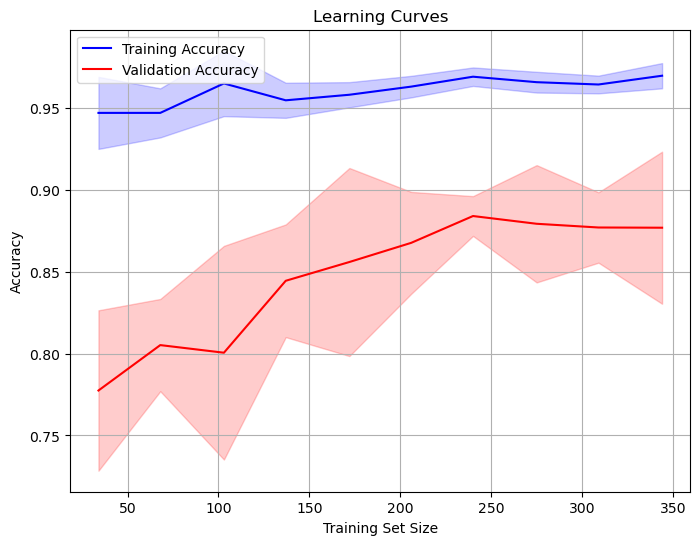

In [85]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
# Define the objective function for hyperparameter tuning
def objective(trial):
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the decision tree model with the best hyperparameters
best_model = DecisionTreeClassifier(
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    min_samples_leaf=study.best_params["min_samples_leaf"],
    random_state=42
)
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 21:19:33,454] A new study created in memory with name: no-name-3a05a07d-431b-4703-abfa-b32b34bf363f
[I 2023-07-27 21:19:33,471] Trial 0 finished with value: -0.6344086021505376 and parameters: {'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: -0.6344086021505376.
[I 2023-07-27 21:19:33,487] Trial 1 finished with value: -0.7634408602150538 and parameters: {'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 8}. Best is trial 1 with value: -0.7634408602150538.
[I 2023-07-27 21:19:33,502] Trial 2 finished with value: -0.8225806451612904 and parameters: {'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 2 with value: -0.8225806451612904.
[I 2023-07-27 21:19:33,524] Trial 3 finished with value: -0.8225806451612904 and parameters: {'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 2 with value: -0.8225806451612904.
[I 2023-07-27 21:19:33,540] Trial 4 finished with value:

[I 2023-07-27 21:19:34,802] Trial 37 finished with value: -0.6559139784946236 and parameters: {'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 12 with value: -0.8387096774193549.
[I 2023-07-27 21:19:34,847] Trial 38 finished with value: -0.8064516129032258 and parameters: {'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 12 with value: -0.8387096774193549.
[I 2023-07-27 21:19:34,888] Trial 39 finished with value: -0.7634408602150538 and parameters: {'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 8}. Best is trial 12 with value: -0.8387096774193549.
[I 2023-07-27 21:19:34,940] Trial 40 finished with value: -0.6344086021505376 and parameters: {'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 12 with value: -0.8387096774193549.
[I 2023-07-27 21:19:34,980] Trial 41 finished with value: -0.8387096774193549 and parameters: {'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 5}. Bes

[I 2023-07-27 21:19:36,493] Trial 74 finished with value: -0.8225806451612904 and parameters: {'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 6}. Best is trial 12 with value: -0.8387096774193549.
[I 2023-07-27 21:19:36,544] Trial 75 finished with value: -0.8387096774193549 and parameters: {'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 12 with value: -0.8387096774193549.
[I 2023-07-27 21:19:36,600] Trial 76 finished with value: -0.6236559139784946 and parameters: {'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 12 with value: -0.8387096774193549.
[I 2023-07-27 21:19:36,652] Trial 77 finished with value: -0.7634408602150538 and parameters: {'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 12 with value: -0.8387096774193549.
[I 2023-07-27 21:19:36,692] Trial 78 finished with value: -0.6559139784946236 and parameters: {'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 4}. Be

Best Hyperparameters: {'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 5}
Best Accuracy: 0.8387096774193549
Accuracy: 83.87096774193549


In [87]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 83.87096774193549


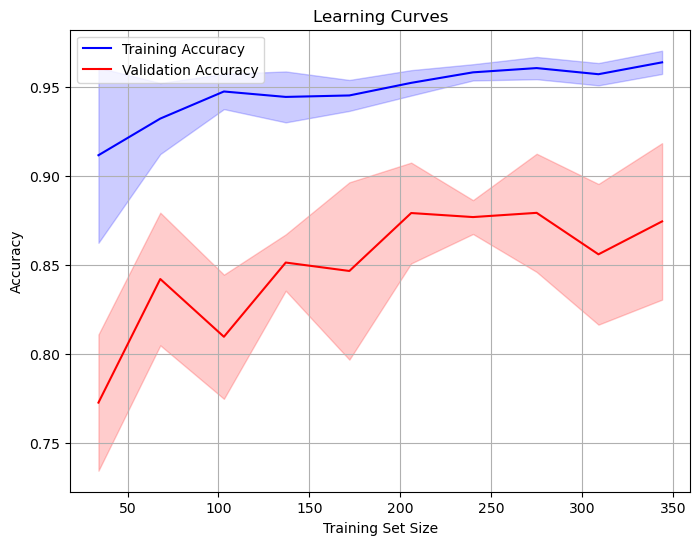

In [88]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### random forest

In [89]:
# Define the objective function for hyperparameter tuning
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the random forest model with the best hyperparameters
best_model = RandomForestClassifier(
    n_estimators=study.best_params["n_estimators"],
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    min_samples_leaf=study.best_params["min_samples_leaf"],
    random_state=42
)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 21:19:59,067] A new study created in memory with name: no-name-b4f1b4a2-a6e8-4315-94f0-963f4210fcef
[I 2023-07-27 21:20:02,882] Trial 0 finished with value: -0.8655913978494624 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 10}. Best is trial 0 with value: -0.8655913978494624.
[I 2023-07-27 21:20:07,216] Trial 1 finished with value: -0.9247311827956989 and parameters: {'n_estimators': 900, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 1 with value: -0.9247311827956989.
[I 2023-07-27 21:20:09,627] Trial 2 finished with value: -0.8602150537634409 and parameters: {'n_estimators': 700, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 10}. Best is trial 1 with value: -0.9247311827956989.
[I 2023-07-27 21:20:11,189] Trial 3 finished with value: -0.9139784946236559 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 7}. Best is trial 1 wi

[I 2023-07-27 21:20:53,961] Trial 34 finished with value: -0.956989247311828 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 26 with value: -0.956989247311828.
[I 2023-07-27 21:20:55,363] Trial 35 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 26 with value: -0.956989247311828.
[I 2023-07-27 21:20:57,621] Trial 36 finished with value: -0.9247311827956989 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 26 with value: -0.956989247311828.
[I 2023-07-27 21:20:59,400] Trial 37 finished with value: -0.9301075268817204 and parameters: {'n_estimators': 400, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 26 with value: -0.956989247311828.
[I 2023-07-27 21:21:00,604] Trial 38 finished with value: -0.8870967741935484 and

[I 2023-07-27 21:21:40,725] Trial 68 finished with value: -0.9301075268817204 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 26 with value: -0.956989247311828.
[I 2023-07-27 21:21:41,439] Trial 69 finished with value: -0.8440860215053764 and parameters: {'n_estimators': 200, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 26 with value: -0.956989247311828.
[I 2023-07-27 21:21:41,999] Trial 70 finished with value: -0.956989247311828 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 26 with value: -0.956989247311828.
[I 2023-07-27 21:21:42,824] Trial 71 finished with value: -0.956989247311828 and parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 26 with value: -0.956989247311828.
[I 2023-07-27 21:21:44,416] Trial 72 finished with value: -0.956989247311828 and pa

Best Hyperparameters: {'n_estimators': 200, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 2}
Best Accuracy: 0.956989247311828
Accuracy: 95.6989247311828


In [90]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 95.6989247311828


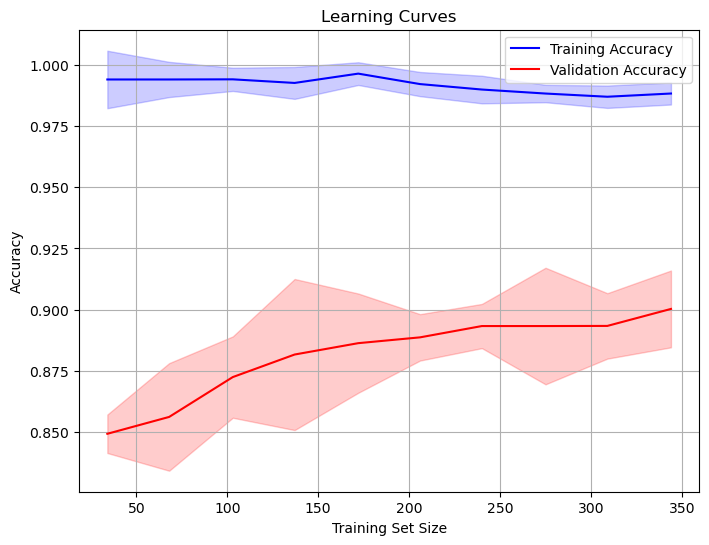

In [91]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
# Define the objective function for hyperparameter tuning
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the random forest model with the best hyperparameters
best_model = RandomForestClassifier(
    n_estimators=study.best_params["n_estimators"],
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    min_samples_leaf=study.best_params["min_samples_leaf"],
    random_state=42
)
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 21:24:00,888] A new study created in memory with name: no-name-513ae7f5-8526-4551-949d-70c85be9523c
[I 2023-07-27 21:24:01,661] Trial 0 finished with value: -0.9086021505376344 and parameters: {'n_estimators': 200, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 0 with value: -0.9086021505376344.
[I 2023-07-27 21:24:04,996] Trial 1 finished with value: -0.8924731182795699 and parameters: {'n_estimators': 800, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: -0.9086021505376344.
[I 2023-07-27 21:24:07,172] Trial 2 finished with value: -0.9193548387096774 and parameters: {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 6}. Best is trial 2 with value: -0.9193548387096774.
[I 2023-07-27 21:24:09,367] Trial 3 finished with value: -0.8870967741935484 and parameters: {'n_estimators': 700, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 2 with v

[I 2023-07-27 21:25:40,218] Trial 34 finished with value: -0.9139784946236559 and parameters: {'n_estimators': 800, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 6}. Best is trial 2 with value: -0.9193548387096774.
[I 2023-07-27 21:25:43,029] Trial 35 finished with value: -0.9139784946236559 and parameters: {'n_estimators': 700, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 2 with value: -0.9193548387096774.
[I 2023-07-27 21:25:46,945] Trial 36 finished with value: -0.9032258064516129 and parameters: {'n_estimators': 1000, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 2 with value: -0.9193548387096774.
[I 2023-07-27 21:25:48,815] Trial 37 finished with value: -0.9193548387096774 and parameters: {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 7}. Best is trial 2 with value: -0.9193548387096774.
[I 2023-07-27 21:25:52,636] Trial 38 finished with value: -0.9032258064516129 and 

[I 2023-07-27 21:27:35,139] Trial 68 finished with value: -0.9139784946236559 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 42 with value: -0.9247311827956989.
[I 2023-07-27 21:27:38,389] Trial 69 finished with value: -0.9086021505376344 and parameters: {'n_estimators': 900, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 42 with value: -0.9247311827956989.
[I 2023-07-27 21:27:40,095] Trial 70 finished with value: -0.9139784946236559 and parameters: {'n_estimators': 400, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 42 with value: -0.9247311827956989.
[I 2023-07-27 21:27:44,252] Trial 71 finished with value: -0.9193548387096774 and parameters: {'n_estimators': 1000, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 42 with value: -0.9247311827956989.
[I 2023-07-27 21:27:48,176] Trial 72 finished with value: -0.9139784946236559

Best Hyperparameters: {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 7}
Best Accuracy: 0.9247311827956989
Accuracy: 92.47311827956989


In [93]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 92.47311827956989


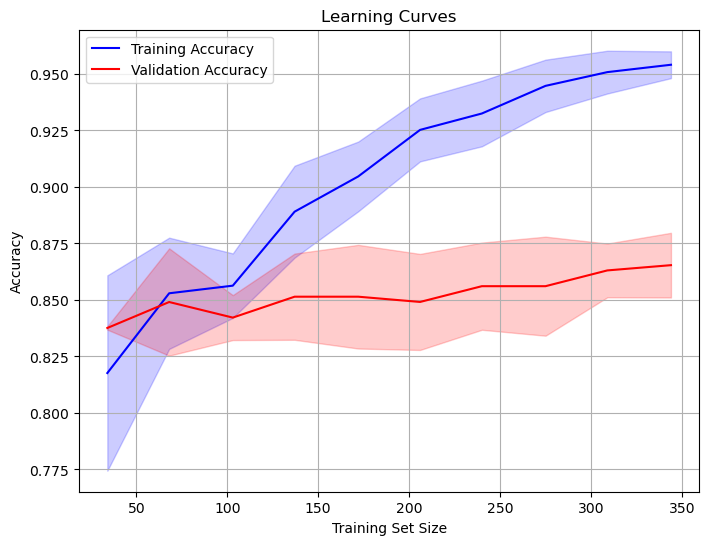

In [94]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### support vector machines

In [95]:
# Define the objective function for hyperparameter tuning
def objective(trial):
    C = trial.suggest_loguniform("C", 1e-3, 1e3)
    gamma = trial.suggest_loguniform("gamma", 1e-3, 1e3)

    model = SVC(C=C, gamma=gamma, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the support vector machine model with the best hyperparameters
best_model = SVC(
    C=study.best_params["C"],
    gamma=study.best_params["gamma"],
    random_state=42
)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 21:32:35,389] A new study created in memory with name: no-name-363b3189-37ee-48ea-ab52-387b4f7cf746
[I 2023-07-27 21:32:35,479] Trial 0 finished with value: -0.7956989247311828 and parameters: {'C': 0.38708234327831337, 'gamma': 0.02053046061959833}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:32:35,578] Trial 1 finished with value: -0.7956989247311828 and parameters: {'C': 77.42741174591073, 'gamma': 1.1812620084310923}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:32:35,674] Trial 2 finished with value: -0.7956989247311828 and parameters: {'C': 0.020283839496110023, 'gamma': 33.00128922786369}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:32:35,761] Trial 3 finished with value: -0.7956989247311828 and parameters: {'C': 0.052149957617768174, 'gamma': 16.686537167464802}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:32:35,852] Trial 4 finished with value: -0.7956989247311828 and parameter

[I 2023-07-27 21:32:39,781] Trial 38 finished with value: -0.7956989247311828 and parameters: {'C': 0.06051066425344182, 'gamma': 0.3932067937449449}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:32:39,909] Trial 39 finished with value: -0.7956989247311828 and parameters: {'C': 0.35709329322400496, 'gamma': 0.045429210431984626}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:32:40,020] Trial 40 finished with value: -0.7956989247311828 and parameters: {'C': 2.3798930242313725, 'gamma': 48.66272596073772}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:32:40,128] Trial 41 finished with value: -0.7956989247311828 and parameters: {'C': 99.42104641571436, 'gamma': 0.011733220907706109}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:32:40,244] Trial 42 finished with value: -0.7956989247311828 and parameters: {'C': 4.397230065490645, 'gamma': 235.5781526345969}. Best is trial 0 with value: -0.7956989247311828.
[I 

[I 2023-07-27 21:32:44,664] Trial 77 finished with value: -0.7956989247311828 and parameters: {'C': 0.9579124555280241, 'gamma': 0.0011244038316531365}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:32:44,801] Trial 78 finished with value: -0.7956989247311828 and parameters: {'C': 5.47598504501753, 'gamma': 0.0034010224265289004}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:32:44,923] Trial 79 finished with value: -0.7956989247311828 and parameters: {'C': 1.9669332605115417, 'gamma': 0.042466772318172696}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:32:45,052] Trial 80 finished with value: -0.7956989247311828 and parameters: {'C': 2.814955946190912, 'gamma': 0.012544200316535406}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:32:45,173] Trial 81 finished with value: -0.7956989247311828 and parameters: {'C': 26.45690445558358, 'gamma': 420.36380825855673}. Best is trial 0 with value: -0.7956989247311828.

Best Hyperparameters: {'C': 0.38708234327831337, 'gamma': 0.02053046061959833}
Best Accuracy: 0.7956989247311828
Accuracy: 79.56989247311827


In [96]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 79.56989247311827


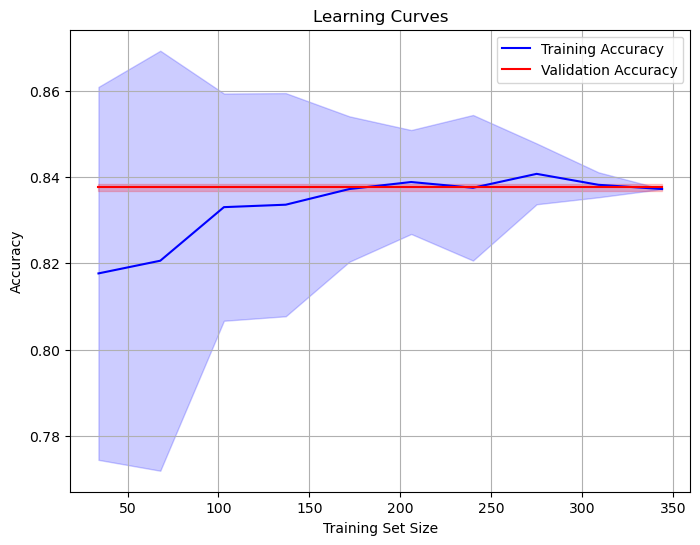

In [97]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
def objective(trial):
    C = trial.suggest_loguniform("C", 1e-3, 1e3)
    gamma = trial.suggest_loguniform("gamma", 1e-3, 1e3)

    model = SVC(C=C, gamma=gamma, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the support vector machine model with the best hyperparameters
best_model = SVC(
    C=study.best_params["C"],
    gamma=study.best_params["gamma"],
    random_state=42
)
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 21:33:11,036] A new study created in memory with name: no-name-744a3fe9-87c8-46b4-9cf8-25ca56287e09
[I 2023-07-27 21:33:11,118] Trial 0 finished with value: -0.7956989247311828 and parameters: {'C': 14.018616922047489, 'gamma': 828.1770873086672}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:33:11,177] Trial 1 finished with value: -0.7956989247311828 and parameters: {'C': 0.011722548794648695, 'gamma': 2.6818785109125813}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:33:11,220] Trial 2 finished with value: -0.7956989247311828 and parameters: {'C': 0.13126234003314285, 'gamma': 0.04066023348888457}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:33:11,287] Trial 3 finished with value: -0.7956989247311828 and parameters: {'C': 0.39909989617699987, 'gamma': 0.23545218149271765}. Best is trial 0 with value: -0.7956989247311828.
[I 2023-07-27 21:33:11,374] Trial 4 finished with value: -0.7956989247311828 and paramete

[I 2023-07-27 21:33:13,319] Trial 38 finished with value: -0.9139784946236559 and parameters: {'C': 5.849941715318135, 'gamma': 0.015032243157335519}. Best is trial 27 with value: -0.9247311827956989.
[I 2023-07-27 21:33:13,402] Trial 39 finished with value: -0.8118279569892473 and parameters: {'C': 16.26433203887093, 'gamma': 0.09167923140244684}. Best is trial 27 with value: -0.9247311827956989.
[I 2023-07-27 21:33:13,463] Trial 40 finished with value: -0.9032258064516129 and parameters: {'C': 100.11338091395592, 'gamma': 0.005796186606750267}. Best is trial 27 with value: -0.9247311827956989.
[I 2023-07-27 21:33:13,512] Trial 41 finished with value: -0.9193548387096774 and parameters: {'C': 6.636879126328274, 'gamma': 0.0037411588878315076}. Best is trial 27 with value: -0.9247311827956989.
[I 2023-07-27 21:33:13,563] Trial 42 finished with value: -0.9193548387096774 and parameters: {'C': 12.937232225938267, 'gamma': 0.0022830455247980276}. Best is trial 27 with value: -0.9247311827

[I 2023-07-27 21:33:15,523] Trial 77 finished with value: -0.9086021505376344 and parameters: {'C': 11.67147935661709, 'gamma': 0.003214117477953982}. Best is trial 27 with value: -0.9247311827956989.
[I 2023-07-27 21:33:15,584] Trial 78 finished with value: -0.9193548387096774 and parameters: {'C': 7.429108643236635, 'gamma': 0.0015671558067826732}. Best is trial 27 with value: -0.9247311827956989.
[I 2023-07-27 21:33:15,650] Trial 79 finished with value: -0.9193548387096774 and parameters: {'C': 1.6339842829428683, 'gamma': 0.011003602248094446}. Best is trial 27 with value: -0.9247311827956989.
[I 2023-07-27 21:33:15,702] Trial 80 finished with value: -0.8709677419354839 and parameters: {'C': 0.7603229252959605, 'gamma': 0.006637240565993392}. Best is trial 27 with value: -0.9247311827956989.
[I 2023-07-27 21:33:15,759] Trial 81 finished with value: -0.9139784946236559 and parameters: {'C': 30.047582458603905, 'gamma': 0.0022068392565939825}. Best is trial 27 with value: -0.92473118

Best Hyperparameters: {'C': 34.602506779187536, 'gamma': 0.002836583627139732}
Best Accuracy: 0.9247311827956989
Accuracy: 92.47311827956989


In [99]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 92.47311827956989


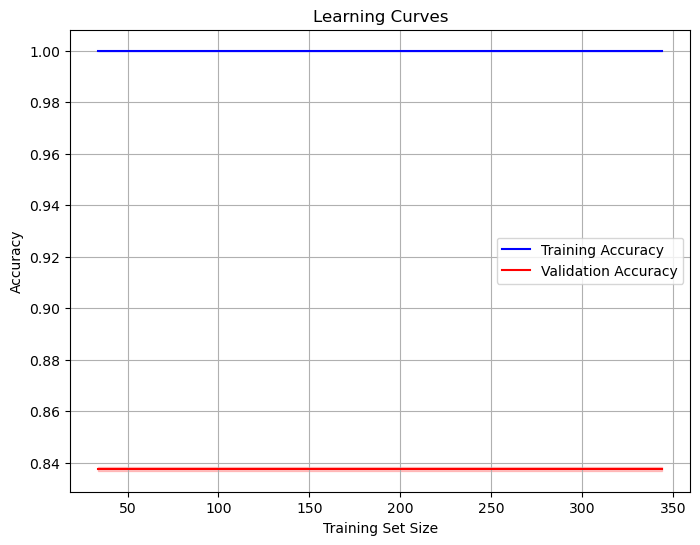

In [100]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### naive bayes

In [101]:
# Define the objective function for hyperparameter tuning
def objective(trial):
    var_smoothing = trial.suggest_loguniform("var_smoothing", 1e-9, 1e-3)

    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the Naive Bayes model with the best hyperparameters
best_model = GaussianNB(var_smoothing=study.best_params["var_smoothing"])
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 21:36:09,149] A new study created in memory with name: no-name-c3a86967-bd65-4d1d-afb1-17eda9cdc09b
[I 2023-07-27 21:36:09,165] Trial 0 finished with value: -0.7903225806451613 and parameters: {'var_smoothing': 0.00023098461919190055}. Best is trial 0 with value: -0.7903225806451613.
[I 2023-07-27 21:36:09,184] Trial 1 finished with value: -0.8279569892473119 and parameters: {'var_smoothing': 1.9605675086179806e-06}. Best is trial 1 with value: -0.8279569892473119.
[I 2023-07-27 21:36:09,190] Trial 2 finished with value: -0.7849462365591398 and parameters: {'var_smoothing': 0.00011537052108075137}. Best is trial 1 with value: -0.8279569892473119.
[I 2023-07-27 21:36:09,210] Trial 3 finished with value: -0.8172043010752689 and parameters: {'var_smoothing': 1.182220176684862e-05}. Best is trial 1 with value: -0.8279569892473119.
[I 2023-07-27 21:36:09,226] Trial 4 finished with value: -0.8064516129032258 and parameters: {'var_smoothing': 2.5764850853573747e-05}. Best is tri

[I 2023-07-27 21:36:10,162] Trial 41 finished with value: -0.8494623655913979 and parameters: {'var_smoothing': 1.8069176465421475e-09}. Best is trial 12 with value: -0.8494623655913979.
[I 2023-07-27 21:36:10,189] Trial 42 finished with value: -0.8494623655913979 and parameters: {'var_smoothing': 1.934471499637161e-09}. Best is trial 12 with value: -0.8494623655913979.
[I 2023-07-27 21:36:10,224] Trial 43 finished with value: -0.8387096774193549 and parameters: {'var_smoothing': 3.868943687941724e-09}. Best is trial 12 with value: -0.8494623655913979.
[I 2023-07-27 21:36:10,253] Trial 44 finished with value: -0.8494623655913979 and parameters: {'var_smoothing': 1.902910124277927e-09}. Best is trial 12 with value: -0.8494623655913979.
[I 2023-07-27 21:36:10,285] Trial 45 finished with value: -0.8279569892473119 and parameters: {'var_smoothing': 1.2700474916659805e-08}. Best is trial 12 with value: -0.8494623655913979.
[I 2023-07-27 21:36:10,307] Trial 46 finished with value: -0.8494623

[I 2023-07-27 21:36:11,587] Trial 83 finished with value: -0.8387096774193549 and parameters: {'var_smoothing': 3.4425079011974487e-09}. Best is trial 12 with value: -0.8494623655913979.
[I 2023-07-27 21:36:11,633] Trial 84 finished with value: -0.8494623655913979 and parameters: {'var_smoothing': 2.1231950654052193e-09}. Best is trial 12 with value: -0.8494623655913979.
[I 2023-07-27 21:36:11,668] Trial 85 finished with value: -0.8494623655913979 and parameters: {'var_smoothing': 1.0099309445095235e-09}. Best is trial 12 with value: -0.8494623655913979.
[I 2023-07-27 21:36:11,702] Trial 86 finished with value: -0.8494623655913979 and parameters: {'var_smoothing': 1.5125140175173836e-09}. Best is trial 12 with value: -0.8494623655913979.
[I 2023-07-27 21:36:11,733] Trial 87 finished with value: -0.8387096774193549 and parameters: {'var_smoothing': 3.4976562021997956e-09}. Best is trial 12 with value: -0.8494623655913979.
[I 2023-07-27 21:36:11,754] Trial 88 finished with value: -0.8494

Best Hyperparameters: {'var_smoothing': 1.451900123929453e-09}
Best Accuracy: 0.8494623655913979
Accuracy: 84.94623655913979


In [102]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 84.94623655913979


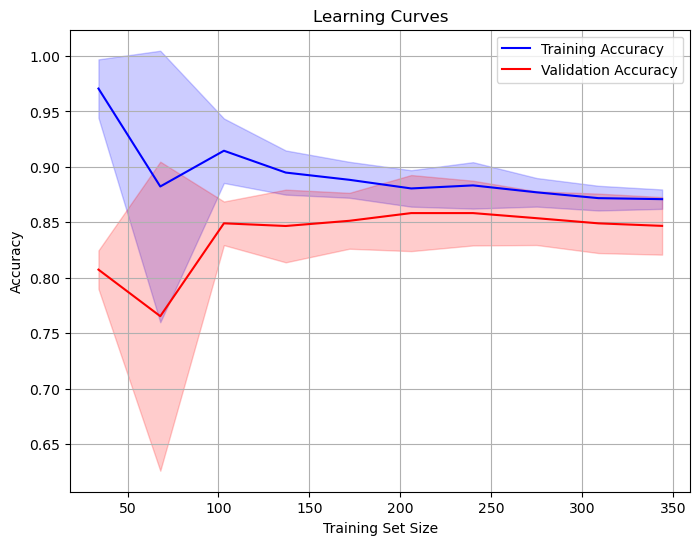

In [103]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [104]:
# Define the objective function for hyperparameter tuning
def objective(trial):
    var_smoothing = trial.suggest_loguniform("var_smoothing", 1e-9, 1e-3)

    model = GaussianNB(var_smoothing=var_smoothing)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the Naive Bayes model with the best hyperparameters
best_model = GaussianNB(var_smoothing=study.best_params["var_smoothing"])
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 21:36:41,555] A new study created in memory with name: no-name-6c7c7330-d9ec-4323-a64d-da6d7ca00cfd
[I 2023-07-27 21:36:41,566] Trial 0 finished with value: -0.26881720430107525 and parameters: {'var_smoothing': 0.000275014867861149}. Best is trial 0 with value: -0.26881720430107525.
[I 2023-07-27 21:36:41,572] Trial 1 finished with value: -0.23118279569892472 and parameters: {'var_smoothing': 8.528404270132171e-08}. Best is trial 0 with value: -0.26881720430107525.
[I 2023-07-27 21:36:41,581] Trial 2 finished with value: -0.23118279569892472 and parameters: {'var_smoothing': 6.407336780677505e-09}. Best is trial 0 with value: -0.26881720430107525.
[I 2023-07-27 21:36:41,588] Trial 3 finished with value: -0.23118279569892472 and parameters: {'var_smoothing': 3.0018349527650444e-09}. Best is trial 0 with value: -0.26881720430107525.
[I 2023-07-27 21:36:41,598] Trial 4 finished with value: -0.23118279569892472 and parameters: {'var_smoothing': 6.411889389565773e-09}. Best i

[I 2023-07-27 21:36:42,312] Trial 41 finished with value: -0.2956989247311828 and parameters: {'var_smoothing': 0.0008310030434893746}. Best is trial 14 with value: -0.3064516129032258.
[I 2023-07-27 21:36:42,330] Trial 42 finished with value: -0.3064516129032258 and parameters: {'var_smoothing': 0.0009158333413096949}. Best is trial 14 with value: -0.3064516129032258.
[I 2023-07-27 21:36:42,354] Trial 43 finished with value: -0.26344086021505375 and parameters: {'var_smoothing': 0.00017513037679287813}. Best is trial 14 with value: -0.3064516129032258.
[I 2023-07-27 21:36:42,380] Trial 44 finished with value: -0.2956989247311828 and parameters: {'var_smoothing': 0.0005168372827997466}. Best is trial 14 with value: -0.3064516129032258.
[I 2023-07-27 21:36:42,396] Trial 45 finished with value: -0.3064516129032258 and parameters: {'var_smoothing': 0.0009679434392035098}. Best is trial 14 with value: -0.3064516129032258.
[I 2023-07-27 21:36:42,424] Trial 46 finished with value: -0.2956989

[I 2023-07-27 21:36:43,229] Trial 83 finished with value: -0.2956989247311828 and parameters: {'var_smoothing': 0.0005091137095971913}. Best is trial 14 with value: -0.3064516129032258.
[I 2023-07-27 21:36:43,247] Trial 84 finished with value: -0.2956989247311828 and parameters: {'var_smoothing': 0.0006902453226869821}. Best is trial 14 with value: -0.3064516129032258.
[I 2023-07-27 21:36:43,271] Trial 85 finished with value: -0.26881720430107525 and parameters: {'var_smoothing': 0.00028492941145732254}. Best is trial 14 with value: -0.3064516129032258.
[I 2023-07-27 21:36:43,290] Trial 86 finished with value: -0.2956989247311828 and parameters: {'var_smoothing': 0.0004736545569637022}. Best is trial 14 with value: -0.3064516129032258.
[I 2023-07-27 21:36:43,312] Trial 87 finished with value: -0.26344086021505375 and parameters: {'var_smoothing': 0.00021462035815845204}. Best is trial 14 with value: -0.3064516129032258.
[I 2023-07-27 21:36:43,331] Trial 88 finished with value: -0.29569

Best Hyperparameters: {'var_smoothing': 0.0009106299842665938}
Best Accuracy: 0.3064516129032258
Accuracy: 30.64516129032258


In [105]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 30.64516129032258


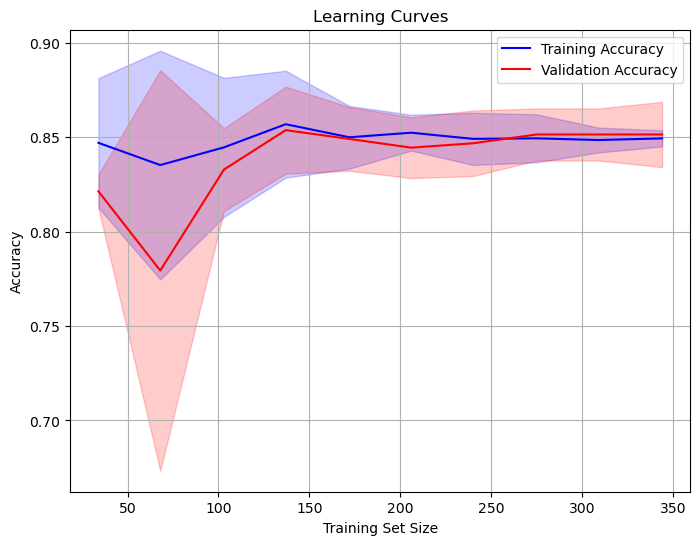

In [106]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### gradient boosting

In [107]:
# Define the objective function for hyperparameter tuning
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.1)
    max_depth = trial.suggest_int("max_depth", 2, 8)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the gradient boosting model with the best hyperparameters
best_model = GradientBoostingClassifier(
    n_estimators=study.best_params["n_estimators"],
    learning_rate=study.best_params["learning_rate"],
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    random_state=42
)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 21:37:15,945] A new study created in memory with name: no-name-00f254c5-a6ea-4fe5-8178-3466cd825ac6
[I 2023-07-27 21:37:22,897] Trial 0 finished with value: -0.9247311827956989 and parameters: {'n_estimators': 317, 'learning_rate': 0.03375123395819066, 'max_depth': 3, 'min_samples_split': 5}. Best is trial 0 with value: -0.9247311827956989.
[I 2023-07-27 21:37:38,141] Trial 1 finished with value: -0.9247311827956989 and parameters: {'n_estimators': 350, 'learning_rate': 0.043171512787194215, 'max_depth': 5, 'min_samples_split': 7}. Best is trial 0 with value: -0.9247311827956989.
[I 2023-07-27 21:37:49,835] Trial 2 finished with value: -0.9301075268817204 and parameters: {'n_estimators': 425, 'learning_rate': 0.019719634526435256, 'max_depth': 3, 'min_samples_split': 10}. Best is trial 2 with value: -0.9301075268817204.
[I 2023-07-27 21:38:02,085] Trial 3 finished with value: -0.946236559139785 and parameters: {'n_estimators': 449, 'learning_rate': 0.07500664775795077, 'm

[I 2023-07-27 21:42:05,699] Trial 32 finished with value: -0.9247311827956989 and parameters: {'n_estimators': 285, 'learning_rate': 0.03914399089983774, 'max_depth': 2, 'min_samples_split': 3}. Best is trial 19 with value: -0.9516129032258065.
[I 2023-07-27 21:42:10,727] Trial 33 finished with value: -0.946236559139785 and parameters: {'n_estimators': 187, 'learning_rate': 0.05693492885143847, 'max_depth': 3, 'min_samples_split': 4}. Best is trial 19 with value: -0.9516129032258065.
[I 2023-07-27 21:42:16,654] Trial 34 finished with value: -0.9516129032258065 and parameters: {'n_estimators': 311, 'learning_rate': 0.05123370912820975, 'max_depth': 2, 'min_samples_split': 3}. Best is trial 19 with value: -0.9516129032258065.
[I 2023-07-27 21:42:29,353] Trial 35 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 464, 'learning_rate': 0.04640320218900606, 'max_depth': 3, 'min_samples_split': 5}. Best is trial 19 with value: -0.9516129032258065.
[I 2023-07-27 21:42:4

[I 2023-07-27 21:47:01,071] Trial 64 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 349, 'learning_rate': 0.0676550019557497, 'max_depth': 2, 'min_samples_split': 8}. Best is trial 19 with value: -0.9516129032258065.
[I 2023-07-27 21:47:06,489] Trial 65 finished with value: -0.9193548387096774 and parameters: {'n_estimators': 120, 'learning_rate': 0.045274725519727395, 'max_depth': 5, 'min_samples_split': 5}. Best is trial 19 with value: -0.9516129032258065.
[I 2023-07-27 21:47:14,553] Trial 66 finished with value: -0.9354838709677419 and parameters: {'n_estimators': 291, 'learning_rate': 0.04944930198148502, 'max_depth': 3, 'min_samples_split': 4}. Best is trial 19 with value: -0.9516129032258065.
[I 2023-07-27 21:47:18,312] Trial 67 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 194, 'learning_rate': 0.05681674538650763, 'max_depth': 2, 'min_samples_split': 6}. Best is trial 19 with value: -0.9516129032258065.
[I 2023-07-27 21:47:

[I 2023-07-27 21:51:46,009] Trial 96 finished with value: -0.946236559139785 and parameters: {'n_estimators': 499, 'learning_rate': 0.05103607776505822, 'max_depth': 4, 'min_samples_split': 9}. Best is trial 19 with value: -0.9516129032258065.
[I 2023-07-27 21:51:53,416] Trial 97 finished with value: -0.946236559139785 and parameters: {'n_estimators': 270, 'learning_rate': 0.059726052316904685, 'max_depth': 3, 'min_samples_split': 9}. Best is trial 19 with value: -0.9516129032258065.
[I 2023-07-27 21:52:02,643] Trial 98 finished with value: -0.9354838709677419 and parameters: {'n_estimators': 487, 'learning_rate': 0.056697430931796695, 'max_depth': 2, 'min_samples_split': 8}. Best is trial 19 with value: -0.9516129032258065.
[I 2023-07-27 21:52:08,940] Trial 99 finished with value: -0.9247311827956989 and parameters: {'n_estimators': 225, 'learning_rate': 0.06468476487118514, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 19 with value: -0.9516129032258065.


Best Hyperparameters: {'n_estimators': 265, 'learning_rate': 0.0508007850006844, 'max_depth': 2, 'min_samples_split': 4}
Best Accuracy: 0.9516129032258065
Accuracy: 95.16129032258065


In [108]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 95.16129032258065


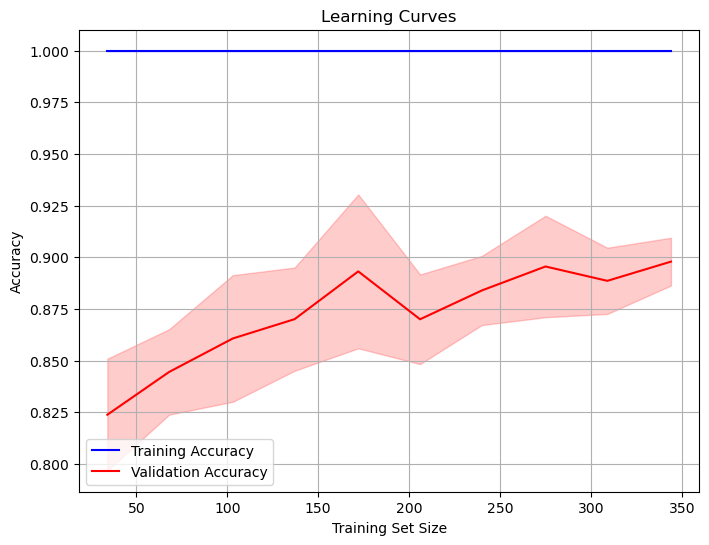

In [109]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Define the objective function for hyperparameter tuning
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.1)
    max_depth = trial.suggest_int("max_depth", 2, 8)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=200)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the gradient boosting model with the best hyperparameters
best_model = GradientBoostingClassifier(
    n_estimators=study.best_params["n_estimators"],
    learning_rate=study.best_params["learning_rate"],
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    random_state=42
)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 20:19:13,804] A new study created in memory with name: no-name-4bcdc8db-d0d1-4ad1-9e69-2e8542913da8
[I 2023-07-27 20:19:25,585] Trial 0 finished with value: -0.8817204301075269 and parameters: {'n_estimators': 400, 'learning_rate': 0.027566037099703327, 'max_depth': 6, 'min_samples_split': 2}. Best is trial 0 with value: -0.8817204301075269.
[I 2023-07-27 20:19:28,586] Trial 1 finished with value: -0.9193548387096774 and parameters: {'n_estimators': 215, 'learning_rate': 0.05607302700455339, 'max_depth': 4, 'min_samples_split': 9}. Best is trial 1 with value: -0.9193548387096774.
[I 2023-07-27 20:19:33,787] Trial 2 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 358, 'learning_rate': 0.04911332936241244, 'max_depth': 4, 'min_samples_split': 4}. Best is trial 2 with value: -0.9408602150537635.
[I 2023-07-27 20:19:36,385] Trial 3 finished with value: -0.9247311827956989 and parameters: {'n_estimators': 207, 'learning_rate': 0.011526206166858675, 'm

[I 2023-07-27 20:21:23,411] Trial 32 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 227, 'learning_rate': 0.05430419631545689, 'max_depth': 3, 'min_samples_split': 6}. Best is trial 26 with value: -0.9516129032258065.
[I 2023-07-27 20:21:27,204] Trial 33 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 288, 'learning_rate': 0.06169249285460006, 'max_depth': 4, 'min_samples_split': 4}. Best is trial 26 with value: -0.9516129032258065.
[I 2023-07-27 20:21:29,810] Trial 34 finished with value: -0.9354838709677419 and parameters: {'n_estimators': 202, 'learning_rate': 0.047978843933619966, 'max_depth': 4, 'min_samples_split': 3}. Best is trial 26 with value: -0.9516129032258065.
[I 2023-07-27 20:21:33,708] Trial 35 finished with value: -0.9354838709677419 and parameters: {'n_estimators': 344, 'learning_rate': 0.05423527515337405, 'max_depth': 3, 'min_samples_split': 5}. Best is trial 26 with value: -0.9516129032258065.
[I 2023-07-27 20:21

[I 2023-07-27 20:23:26,481] Trial 64 finished with value: -0.8440860215053764 and parameters: {'n_estimators': 245, 'learning_rate': 0.04660329856310684, 'max_depth': 8, 'min_samples_split': 9}. Best is trial 41 with value: -0.956989247311828.
[I 2023-07-27 20:23:33,399] Trial 65 finished with value: -0.946236559139785 and parameters: {'n_estimators': 327, 'learning_rate': 0.06387614914626685, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 41 with value: -0.956989247311828.
[I 2023-07-27 20:23:36,911] Trial 66 finished with value: -0.9193548387096774 and parameters: {'n_estimators': 169, 'learning_rate': 0.0727937304939239, 'max_depth': 6, 'min_samples_split': 4}. Best is trial 41 with value: -0.956989247311828.
[I 2023-07-27 20:23:40,670] Trial 67 finished with value: -0.9301075268817204 and parameters: {'n_estimators': 230, 'learning_rate': 0.055552341202445364, 'max_depth': 4, 'min_samples_split': 8}. Best is trial 41 with value: -0.956989247311828.
[I 2023-07-27 20:23:43,9

[I 2023-07-27 20:25:48,145] Trial 96 finished with value: -0.9247311827956989 and parameters: {'n_estimators': 174, 'learning_rate': 0.048588938266357386, 'max_depth': 5, 'min_samples_split': 3}. Best is trial 41 with value: -0.956989247311828.
[I 2023-07-27 20:25:51,543] Trial 97 finished with value: -0.9516129032258065 and parameters: {'n_estimators': 218, 'learning_rate': 0.06265960375002866, 'max_depth': 5, 'min_samples_split': 9}. Best is trial 41 with value: -0.956989247311828.
[I 2023-07-27 20:25:54,856] Trial 98 finished with value: -0.9301075268817204 and parameters: {'n_estimators': 222, 'learning_rate': 0.06230798590307903, 'max_depth': 5, 'min_samples_split': 9}. Best is trial 41 with value: -0.956989247311828.
[I 2023-07-27 20:25:59,159] Trial 99 finished with value: -0.9301075268817204 and parameters: {'n_estimators': 212, 'learning_rate': 0.05815756070198821, 'max_depth': 6, 'min_samples_split': 8}. Best is trial 41 with value: -0.956989247311828.
[I 2023-07-27 20:26:03,

[I 2023-07-27 20:27:46,615] Trial 128 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 159, 'learning_rate': 0.05996245304468138, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 41 with value: -0.956989247311828.
[I 2023-07-27 20:27:50,094] Trial 129 finished with value: -0.9247311827956989 and parameters: {'n_estimators': 176, 'learning_rate': 0.05672712219752977, 'max_depth': 6, 'min_samples_split': 10}. Best is trial 41 with value: -0.956989247311828.
[I 2023-07-27 20:27:53,501] Trial 130 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 171, 'learning_rate': 0.0663783363270956, 'max_depth': 5, 'min_samples_split': 9}. Best is trial 41 with value: -0.956989247311828.
[I 2023-07-27 20:27:57,602] Trial 131 finished with value: -0.9516129032258065 and parameters: {'n_estimators': 191, 'learning_rate': 0.06207249564692148, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 41 with value: -0.956989247311828.
[I 2023-07-27 20:2

[I 2023-07-27 20:29:45,471] Trial 160 finished with value: -0.9354838709677419 and parameters: {'n_estimators': 226, 'learning_rate': 0.05460792625610555, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 132 with value: -0.9623655913978495.
[I 2023-07-27 20:29:49,303] Trial 161 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 183, 'learning_rate': 0.06457522994153364, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 132 with value: -0.9623655913978495.
[I 2023-07-27 20:29:52,242] Trial 162 finished with value: -0.946236559139785 and parameters: {'n_estimators': 192, 'learning_rate': 0.06399350916447501, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 132 with value: -0.9623655913978495.
[I 2023-07-27 20:29:55,091] Trial 163 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 187, 'learning_rate': 0.06738823721236752, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 132 with value: -0.9623655913978495.
[I 2023-07

[I 2023-07-27 20:31:41,900] Trial 192 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 192, 'learning_rate': 0.06564550098189859, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 132 with value: -0.9623655913978495.
[I 2023-07-27 20:31:45,237] Trial 193 finished with value: -0.9408602150537635 and parameters: {'n_estimators': 162, 'learning_rate': 0.036628862269343275, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 132 with value: -0.9623655913978495.
[I 2023-07-27 20:31:47,971] Trial 194 finished with value: -0.956989247311828 and parameters: {'n_estimators': 179, 'learning_rate': 0.059370611366688524, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 132 with value: -0.9623655913978495.
[I 2023-07-27 20:31:50,913] Trial 195 finished with value: -0.946236559139785 and parameters: {'n_estimators': 173, 'learning_rate': 0.05612801696933551, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 132 with value: -0.9623655913978495.
[I 2023-

Best Hyperparameters: {'n_estimators': 189, 'learning_rate': 0.06289632085163031, 'max_depth': 5, 'min_samples_split': 10}
Best Accuracy: 0.9623655913978495
Accuracy: 96.23655913978494


In [21]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 96.23655913978494


In [22]:
from sklearn.model_selection import learning_curve

# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

<Figure size 800x600 with 0 Axes>

In [23]:
# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

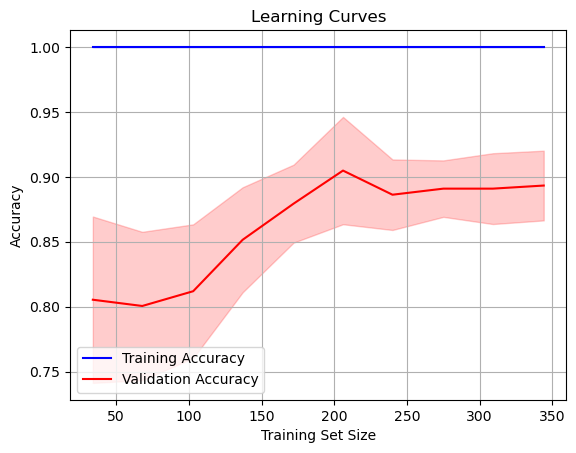

In [24]:
# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()


In [110]:
# Define the objective function for hyperparameter tuning
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.1)
    max_depth = trial.suggest_int("max_depth", 2, 8)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    return -accuracy_score(y_test, y_pred)  # maximize accuracy

# Perform hyperparameter tuning using Optuna
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best accuracy achieved
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", -study.best_value)

# Train the gradient boosting model with the best hyperparameters
best_model = GradientBoostingClassifier(
    n_estimators=study.best_params["n_estimators"],
    learning_rate=study.best_params["learning_rate"],
    max_depth=study.best_params["max_depth"],
    min_samples_split=study.best_params["min_samples_split"],
    random_state=42
)
best_model.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

[I 2023-07-27 21:54:35,093] A new study created in memory with name: no-name-9265b02f-a480-4b0d-8c19-ccc2cbb950b6
[I 2023-07-27 21:54:43,693] Trial 0 finished with value: -0.8333333333333334 and parameters: {'n_estimators': 362, 'learning_rate': 0.02179678515020736, 'max_depth': 3, 'min_samples_split': 10}. Best is trial 0 with value: -0.8333333333333334.
[I 2023-07-27 21:54:47,434] Trial 1 finished with value: -0.8279569892473119 and parameters: {'n_estimators': 85, 'learning_rate': 0.010971877935296975, 'max_depth': 5, 'min_samples_split': 2}. Best is trial 0 with value: -0.8333333333333334.
[I 2023-07-27 21:54:50,608] Trial 2 finished with value: -0.8602150537634409 and parameters: {'n_estimators': 115, 'learning_rate': 0.029824126601809418, 'max_depth': 3, 'min_samples_split': 2}. Best is trial 2 with value: -0.8602150537634409.
[I 2023-07-27 21:54:59,236] Trial 3 finished with value: -0.8494623655913979 and parameters: {'n_estimators': 238, 'learning_rate': 0.06196128485400006, 'm

[I 2023-07-27 22:01:35,250] Trial 32 finished with value: -0.8870967741935484 and parameters: {'n_estimators': 378, 'learning_rate': 0.03576815096868394, 'max_depth': 2, 'min_samples_split': 2}. Best is trial 26 with value: -0.8870967741935484.
[I 2023-07-27 22:01:41,840] Trial 33 finished with value: -0.8817204301075269 and parameters: {'n_estimators': 344, 'learning_rate': 0.035904035296022915, 'max_depth': 2, 'min_samples_split': 3}. Best is trial 26 with value: -0.8870967741935484.
[I 2023-07-27 22:01:52,411] Trial 34 finished with value: -0.8387096774193549 and parameters: {'n_estimators': 387, 'learning_rate': 0.04900461875802913, 'max_depth': 3, 'min_samples_split': 2}. Best is trial 26 with value: -0.8870967741935484.
[I 2023-07-27 22:02:05,369] Trial 35 finished with value: -0.8548387096774194 and parameters: {'n_estimators': 355, 'learning_rate': 0.06422393111555282, 'max_depth': 4, 'min_samples_split': 3}. Best is trial 26 with value: -0.8870967741935484.
[I 2023-07-27 22:02

[I 2023-07-27 22:05:14,848] Trial 64 finished with value: -0.8602150537634409 and parameters: {'n_estimators': 303, 'learning_rate': 0.03302803834202608, 'max_depth': 3, 'min_samples_split': 2}. Best is trial 37 with value: -0.8924731182795699.
[I 2023-07-27 22:05:21,667] Trial 65 finished with value: -0.8817204301075269 and parameters: {'n_estimators': 354, 'learning_rate': 0.038128067970753805, 'max_depth': 2, 'min_samples_split': 2}. Best is trial 37 with value: -0.8924731182795699.
[I 2023-07-27 22:05:27,018] Trial 66 finished with value: -0.8870967741935484 and parameters: {'n_estimators': 278, 'learning_rate': 0.04223479162993236, 'max_depth': 2, 'min_samples_split': 4}. Best is trial 37 with value: -0.8924731182795699.
[I 2023-07-27 22:05:37,706] Trial 67 finished with value: -0.8548387096774194 and parameters: {'n_estimators': 380, 'learning_rate': 0.059107534611239756, 'max_depth': 3, 'min_samples_split': 3}. Best is trial 37 with value: -0.8924731182795699.
[I 2023-07-27 22:0

[I 2023-07-27 22:08:41,684] Trial 96 finished with value: -0.8494623655913979 and parameters: {'n_estimators': 256, 'learning_rate': 0.037548787548092315, 'max_depth': 3, 'min_samples_split': 2}. Best is trial 37 with value: -0.8924731182795699.
[I 2023-07-27 22:08:46,918] Trial 97 finished with value: -0.8817204301075269 and parameters: {'n_estimators': 272, 'learning_rate': 0.04947536499519904, 'max_depth': 2, 'min_samples_split': 3}. Best is trial 37 with value: -0.8924731182795699.
[I 2023-07-27 22:08:53,786] Trial 98 finished with value: -0.8870967741935484 and parameters: {'n_estimators': 357, 'learning_rate': 0.029102043318015868, 'max_depth': 2, 'min_samples_split': 2}. Best is trial 37 with value: -0.8924731182795699.
[I 2023-07-27 22:08:59,589] Trial 99 finished with value: -0.8870967741935484 and parameters: {'n_estimators': 300, 'learning_rate': 0.04146045173061248, 'max_depth': 2, 'min_samples_split': 3}. Best is trial 37 with value: -0.8924731182795699.


Best Hyperparameters: {'n_estimators': 234, 'learning_rate': 0.043077648025310764, 'max_depth': 2, 'min_samples_split': 3}
Best Accuracy: 0.8924731182795699
Accuracy: 89.24731182795699


In [111]:
# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")

Accuracy: 89.24731182795699


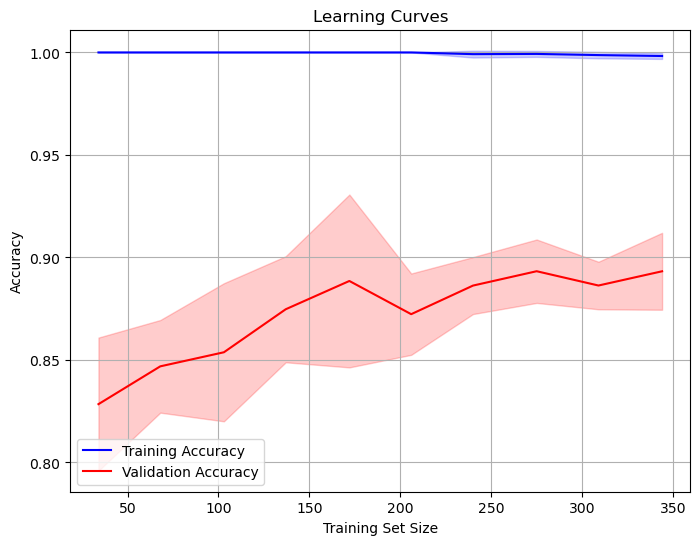

In [112]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

### using randomized search

###### gradient boosting

### 1

### 2

In [114]:
# Define the classifier
clf = GradientBoostingClassifier()

# Define the parameter grid for hyperparameter search
param_dist = {
    "n_estimators": sp_randint(10, 100),
    "learning_rate": [0.1, 0.05, 0.01],
    "max_depth": sp_randint(1, 10),
    "subsample": [0.5, 0.7, 1.0],
    "max_features": ["sqrt", "log2", None]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': None, 'n_estimators': 44, 'subsample': 0.7}
Accuracy on Test Set: 92.47%


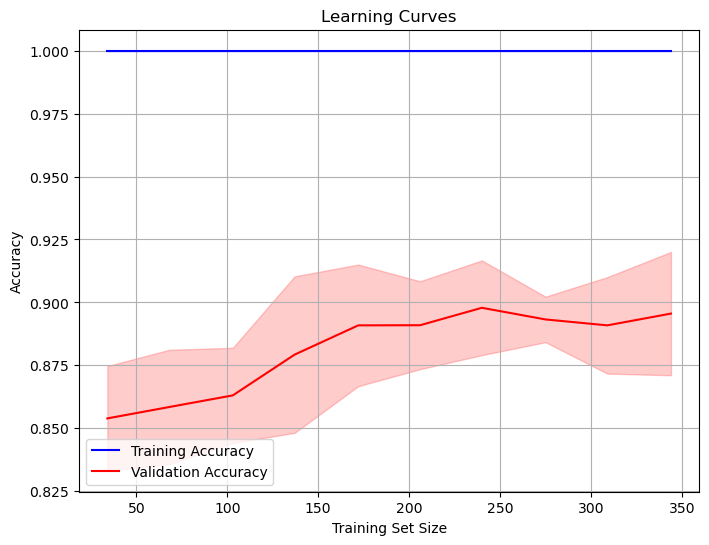

In [115]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
# Define the classifier
clf = GradientBoostingClassifier()

# Define the parameter grid for hyperparameter search
param_dist = {
    "n_estimators": sp_randint(10, 100),
    "learning_rate": [0.1, 0.05, 0.01],
    "max_depth": sp_randint(1, 10),
    "subsample": [0.5, 0.7, 1.0],
    "max_features": ["sqrt", "log2", None]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test_scaled, y_test)
print("Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': None, 'n_estimators': 44, 'subsample': 0.7}
Accuracy on Test Set: 85.48%


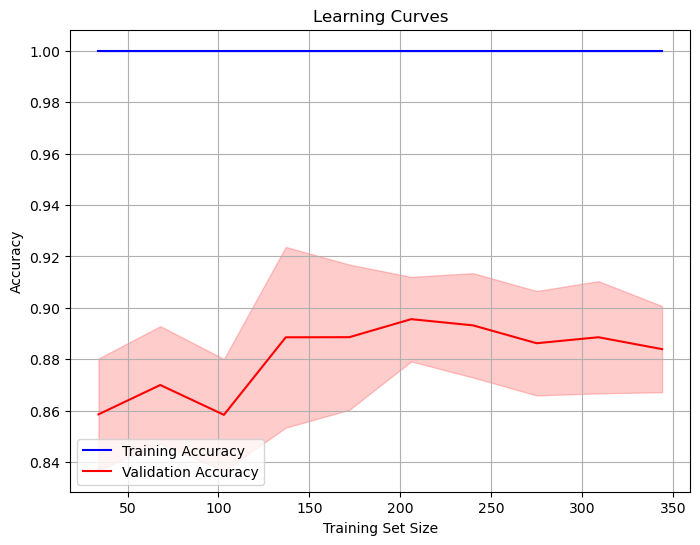

In [117]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### decision trees

In [118]:
model = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter search
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": sp_randint(1, 10),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "max_features": sp_randint(1, X.shape[1] + 1),
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 45, 'min_samples_leaf': 9, 'min_samples_split': 2}
Accuracy on Test Set: 86.56%


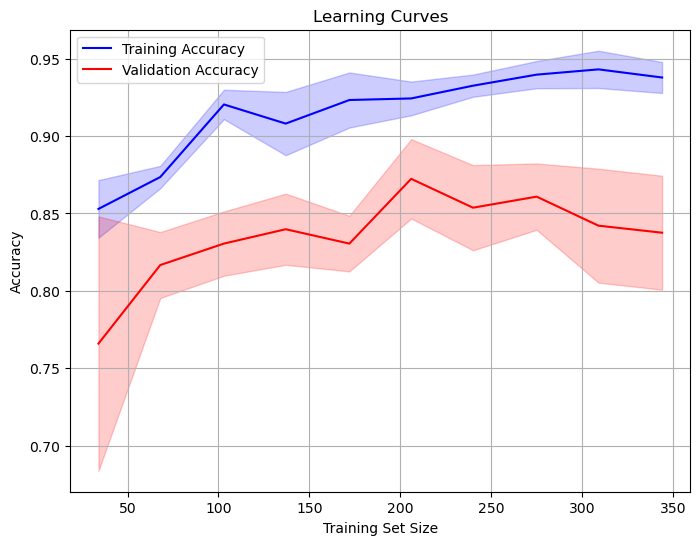

In [119]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [120]:
model = DecisionTreeClassifier()

# Define the parameter grid for hyperparameter search
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": sp_randint(1, 10),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "max_features": sp_randint(1, X.shape[1] + 1),
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test_scaled, y_test)
print("Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 44, 'min_samples_leaf': 8, 'min_samples_split': 4}
Accuracy on Test Set: 87.10%


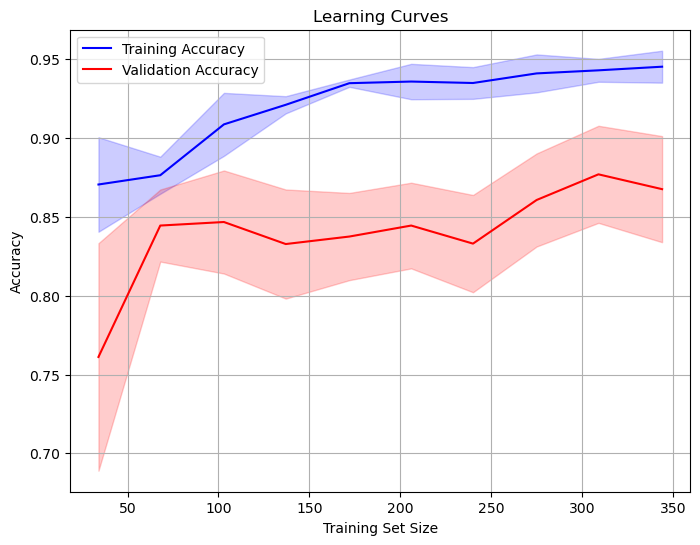

In [121]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### random forest

In [122]:
# Define the classifier
clf = RandomForestClassifier()

# Define the parameter grid for hyperparameter search
param_dist = {
    "n_estimators": sp_randint(10, 100),
    "max_depth": [None] + list(range(1, 10)),
    "max_features": sp_randint(1, X.shape[1] + 1),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

Best Hyperparameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 57}
Accuracy on Test Set: 94.62%


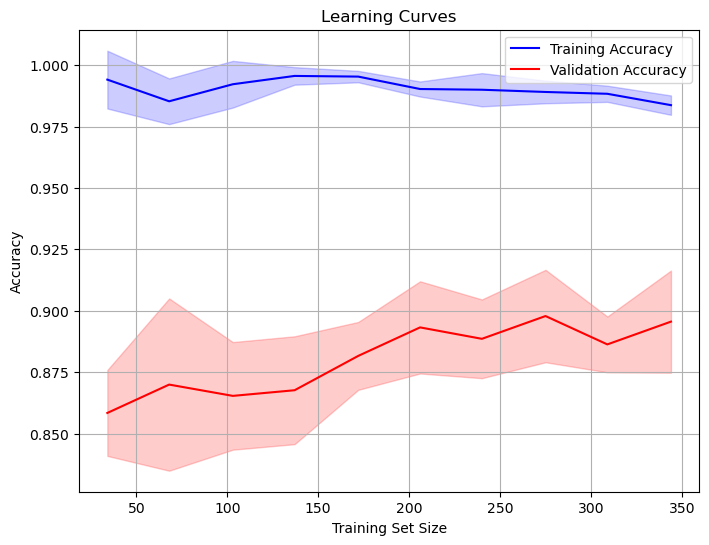

In [123]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [124]:
# Define the classifier
clf = RandomForestClassifier()

# Define the parameter grid for hyperparameter search
param_dist = {
    "n_estimators": sp_randint(10, 100),
    "max_depth": [None] + list(range(1, 10)),
    "max_features": sp_randint(1, X.shape[1] + 1),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test_scaled, y_test)
print("Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

Best Hyperparameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'max_features': 53, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 33}
Accuracy on Test Set: 80.65%


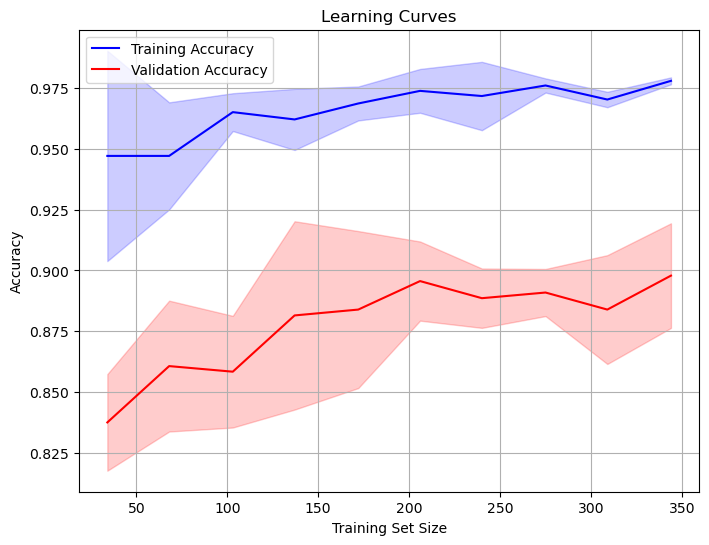

In [125]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
from scipy.stats import uniform

###### logistic regression

In [127]:
# Define the classifier
clf = LogisticRegression()

# Define the parameter grid for hyperparameter search
param_dist = {
    "penalty": ["l1", "l2"],
    "C": uniform(loc=0, scale=4)
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

Best Hyperparameters:  {'C': 0.0031150633640573133, 'penalty': 'l2'}
Accuracy on Test Set: 83.33%


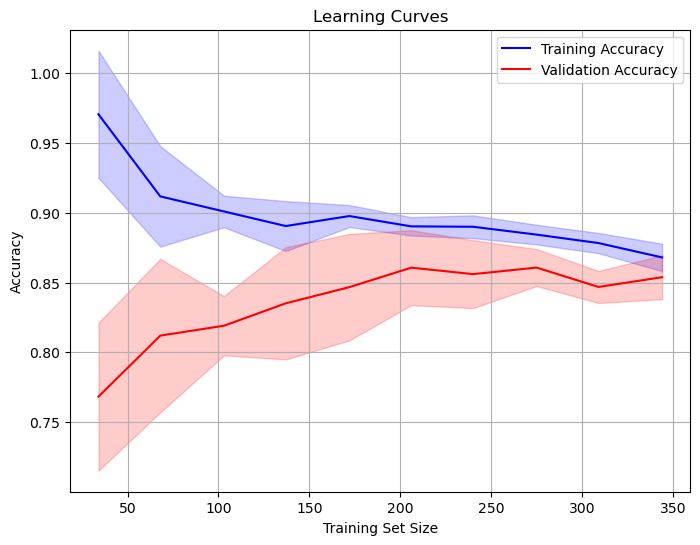

In [128]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)

# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

In [129]:
# Define the classifier
clf = LogisticRegression()

# Define the parameter grid for hyperparameter search
param_dist = {
    "penalty": ["l1", "l2"],
    "C": uniform(loc=0, scale=4)
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=20, cv=5, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters: ", random_search.best_params_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
accuracy = best_model.score(X_test_scaled, y_test)
print("Accuracy on Test Set: {:.2f}%".format(accuracy * 100))

Best Hyperparameters:  {'C': 0.23233444867279784, 'penalty': 'l2'}
Accuracy on Test Set: 89.78%


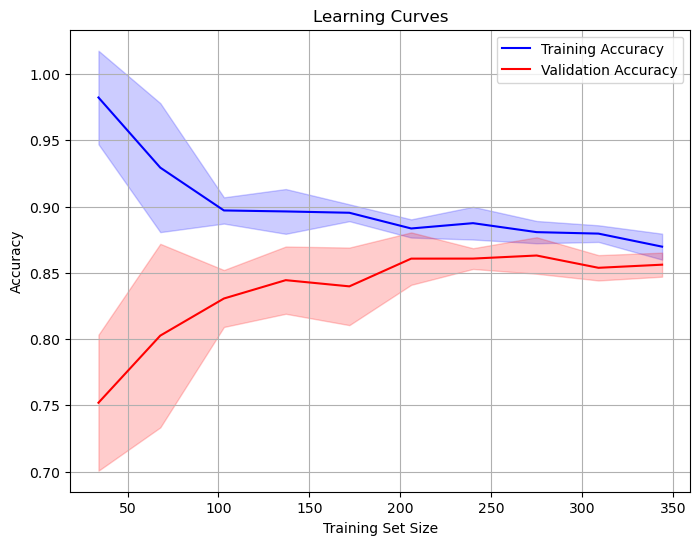

In [130]:
# Plot the learning curves for the best model
plt.figure(figsize=(8, 6))
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, scoring='accuracy', shuffle=True, random_state=42
)
0
# Calculate the mean and standard deviation of train and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves with the mean and standard deviation
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Accuracy', color='red')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2, color='red')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

###### using support vector machines